## Qualité, traitement  et analyse exploratoires des données : Enquete salaires 

Ce projet vise à explorer, analyser et prédire les salaires à partir d'un jeu de données multidimensionnel. Il combine plusieurs étapes essentielles de la science des données pour garantir une analyse approfondie et des prédictions robustes. Les principales étapes du projet incluent :

1. **Qualité des données** : Identification et traitement des problèmes de qualité, tels que les valeurs manquantes, les incohérences, et les outliers.
2. **Exploration des données** : Calcul des statistiques descriptives et création de visualisations pour mieux comprendre les tendances et les relations entre les variables.
3. **Traitement des variables textuelles** : Application de techniques de NLP (comme TF-IDF) pour transformer les données textuelles en formats exploitables.
4. **Réduction de dimension** : Utilisation de méthodes telles que l'analyse en composantes principales (PCA) et le manifold learning pour visualiser et simplifier les données tout en conservant les informations clés.
5. **Choix et application de modèles de machine learning** : Comparaison de différents algorithmes de régression, tels que Random Forest, Gradient Boosting et XGBoost, pour prédire les salaires à partir des caractéristiques des individus.

L’objectif final est de fournir un pipeline complet et efficace pour prédire les salaires, tout en mettant en avant l’importance de la qualité et de la préparation des données. Ce projet peut être appliqué dans des contextes pratiques tels que l’analyse des tendances salariales

In [1]:
from sklearn import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import pandas as pd
import seaborn as sns
data = pd.read_csv('data.csv')
print(data.head())
print("INFO -----------------------")
print(data.info())
print("SHAPE ----------------------")
print("dataet=" , data.shape)
print("COLUMNS ----------------------")
print("Columns=" ,data.columns)





            Timestamp How old are you?  What industry do you work in?  \
0  4/27/2021 11:02:10            25-34   Education (Higher Education)   
1  4/27/2021 11:02:22            25-34              Computing or Tech   
2  4/27/2021 11:02:38            25-34  Accounting, Banking & Finance   
3  4/27/2021 11:02:41            25-34                     Nonprofits   
4  4/27/2021 11:02:42            25-34  Accounting, Banking & Finance   

                                  Job title  \
0        Research and Instruction Librarian   
1  Change & Internal Communications Manager   
2                      Marketing Specialist   
3                           Program Manager   
4                        Accounting Manager   

  If your job title needs additional context, please clarify here:  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                

## Analyse des données exploratoires 

In [2]:
new_column_names = [
    'Timestamp',
    'Age',
    'Industry',
    'Job_Title',
    'Job_Clarification',
    'Annual_Salary',
    'Additional_Compensation',
    'Currency',
    'Other_Currency',
    'Income_Context',
    'Country',
    'State',
    'City',
    'Total_Experience',
    'Field_Experience',
    'Education_Level',
    'Gender',
    'Race'
]

data.columns = new_column_names
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28085 entries, 0 to 28084
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                28085 non-null  object 
 1   Age                      28085 non-null  object 
 2   Industry                 28011 non-null  object 
 3   Job_Title                28084 non-null  object 
 4   Job_Clarification        7267 non-null   object 
 5   Annual_Salary            28085 non-null  object 
 6   Additional_Compensation  20780 non-null  float64
 7   Currency                 28085 non-null  object 
 8   Other_Currency           207 non-null    object 
 9   Income_Context           3044 non-null   object 
 10  Country                  28085 non-null  object 
 11  State                    23059 non-null  object 
 12  City                     28003 non-null  object 
 13  Total_Experience         28085 non-null  object 
 14  Field_Experience      

In [3]:
print(data.shape)
data.columns

(28085, 18)


Index(['Timestamp', 'Age', 'Industry', 'Job_Title', 'Job_Clarification',
       'Annual_Salary', 'Additional_Compensation', 'Currency',
       'Other_Currency', 'Income_Context', 'Country', 'State', 'City',
       'Total_Experience', 'Field_Experience', 'Education_Level', 'Gender',
       'Race'],
      dtype='object')

#####  Quelques visualisations

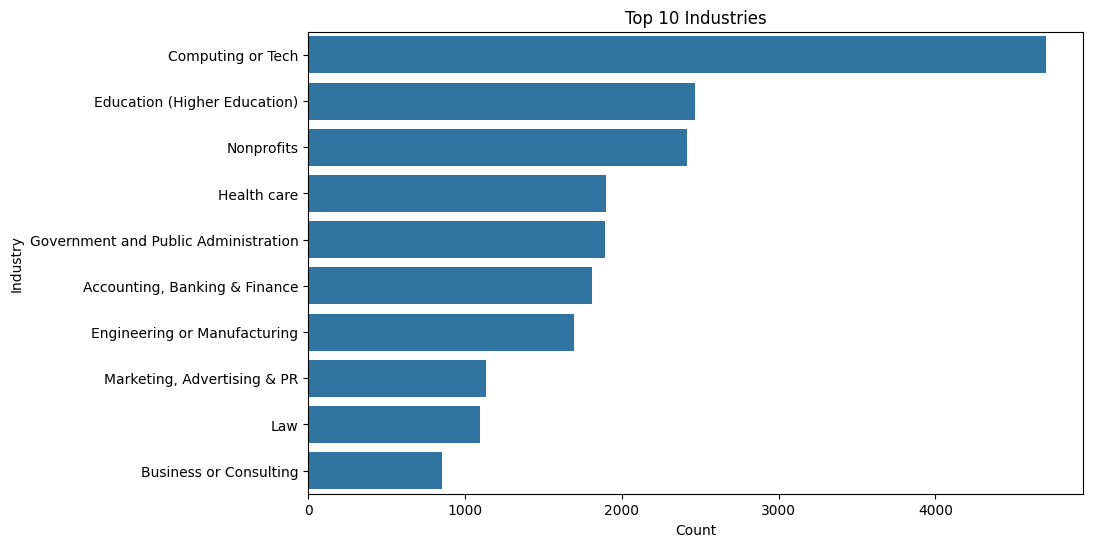

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='Industry', order=data['Industry'].value_counts().head(10).index)
plt.title('Top 10 Industries')
plt.xlabel('Count')
plt.ylabel('Industry')
plt.show()

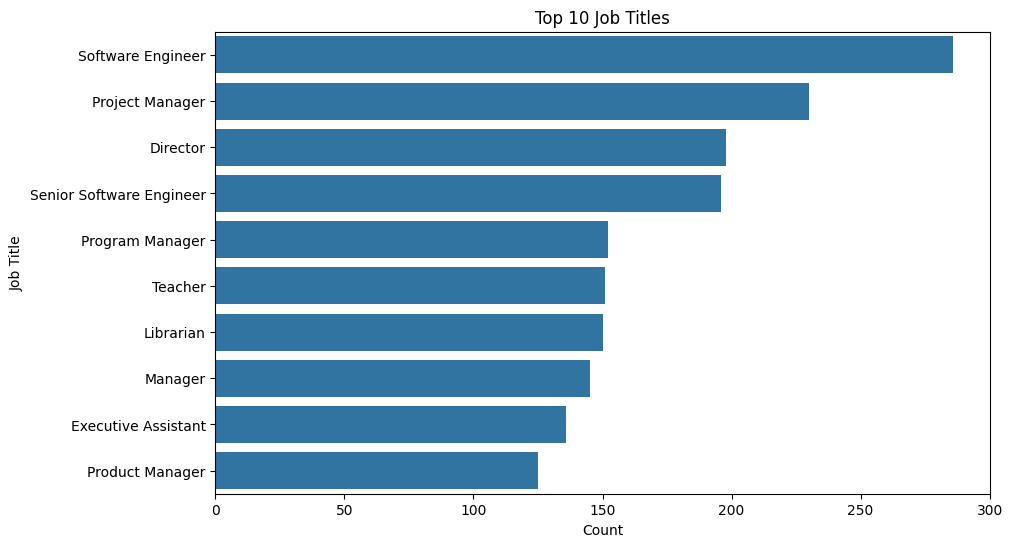

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='Job_Title', order=data['Job_Title'].value_counts().head(10).index)
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


In [4]:
# Nettoyage de la colonne Annual_Salary
data['Annual_Salary'] = pd.to_numeric(data['Annual_Salary'], errors='coerce')  # Conversion en numérique, gestion des erreurs
print(data['Annual_Salary'])

# Calcul des statistiques descriptives
mean_salary = data['Annual_Salary'].mean()  # Moyenne
median_salary = data['Annual_Salary'].median()  # Médiane
min_salary = data['Annual_Salary'].min()  # Salaire minimum
max_salary = data['Annual_Salary'].max()  # Salaire maximum

# Affichage des résultats
print("La moyenne des salaires est de", mean_salary)
print("La médiane des salaires est de", median_salary)
print("Le salaire min est de", min_salary)
print("Le salaire max est de", max_salary)



0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
28080     117000.0
28081      70000.0
28082      28600.0
28083      56160.0
28084    2000000.0
Name: Annual_Salary, Length: 28085, dtype: float64
La moyenne des salaires est de 898272.5391237312
La médiane des salaires est de 76000.0
Le salaire min est de 0.0
Le salaire max est de 6000070000.0


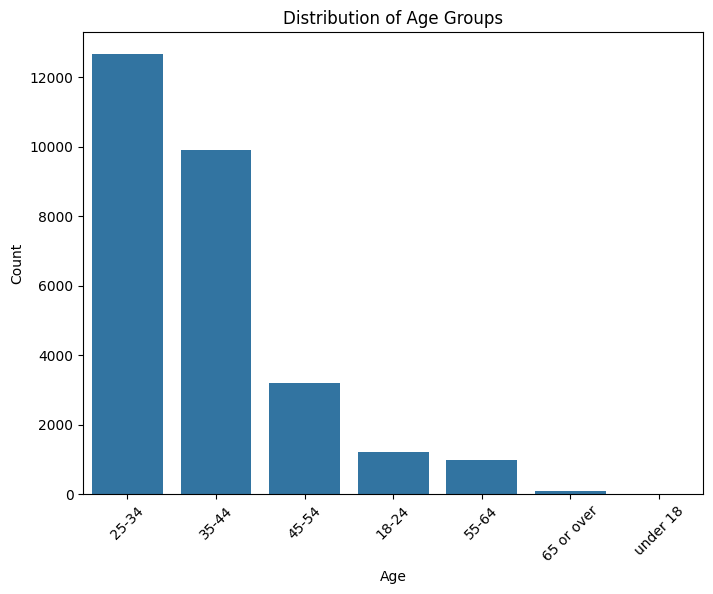

In [7]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Age', order=data['Age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


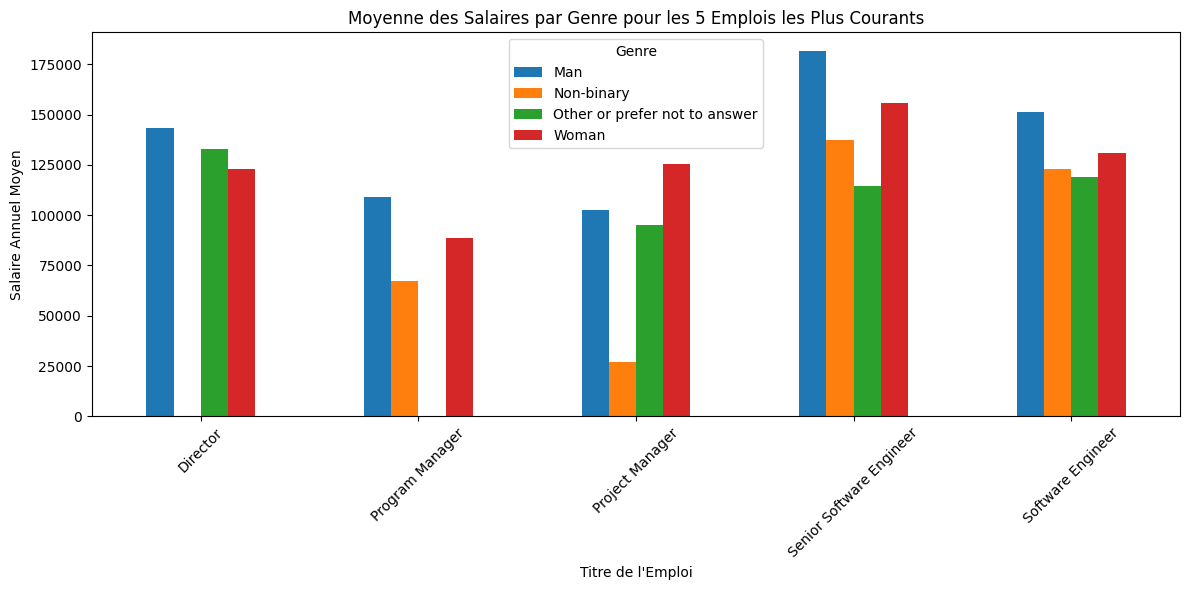

In [29]:
top_jobs = data['Job_Title'].value_counts().nlargest(5).index

top_jobs_data = data[data['Job_Title'].isin(top_jobs)].copy()  # Utiliser .copy() pour éviter l'avertissement

top_jobs_data.loc[:, 'Annual_Salary'] = pd.to_numeric(top_jobs_data['Annual_Salary'], errors='coerce')

salary_means = top_jobs_data.groupby(['Job_Title', 'Gender'])['Annual_Salary'].mean().unstack()

salary_means.plot(kind='bar', figsize=(12, 6))
plt.title('Moyenne des Salaires par Genre pour les 5 Emplois les Plus Courants')
plt.xlabel('Titre de l\'Emploi')
plt.ylabel('Salaire Annuel Moyen')
plt.xticks(rotation=45)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

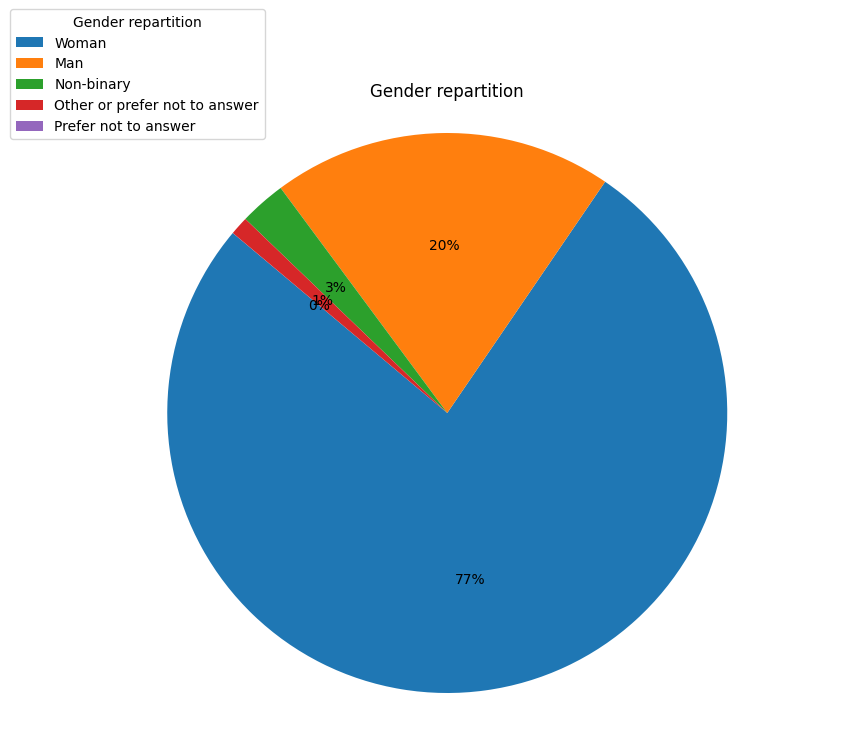

In [7]:
gender_counts = data['Gender'].value_counts().nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(gender_counts, labels=None, autopct="%1.f%%", startangle=140)

plt.legend(title="Gender repartition", labels=gender_counts.index, bbox_to_anchor=(0.1, 1.05), loc='center', fontsize=10)
plt.title('Gender repartition')
plt.axis('equal')
plt.show()

### Traitement et qualité de données 

- **Que représente chaque caractéristique (feature) ?**  
- **Quelles sont les caractéristiques informatives et intéressantes à conserver ?**  
- **Pour quel type de problèmes d'apprentissage pourrait-on utiliser cet ensemble de données ?**  

Voici les caractéristiques importants à utiliser :

*   Age : L'âge , qui peut influencer le niveau de salaire.
*   Industry : Le secteur d'activité.
*   Job_Title : Le titre du poste occupé.
*   Currency : La devise dans laquelle le salaire est payé, importante pour les comparaisons internationales.
*   Other_Currency : Une option pour indiquer une devise différente si nécessaire.
*   Annual_Salary : Le salaire annuel total, la variable principale qui nous intéresse.
*   Country : Le pays de résidence.
*   Gender : Le sexe du répondant.

On peut utiliser ce jeu de données pour faire de la régression pour estimer le salaire annuel en fonction de différentes caractéristiques, pour la classification afin de voir dans quelle fourchette de salaire une personne pourrait se situer selon certains facteurs, et pour le clustering pour regrouper les répondants selon des traits communs dans le but d’analyser des segments de marché.



In [5]:
important_data = data.copy()
important_data = important_data[[
    'Age',
    'Industry',
    'Job_Title',
    'Currency',
    'Other_Currency',
    'Annual_Salary',
    'Country',
    'Gender',
    'Total_Experience',
    'Education_Level'

]]

important_data['Annual_Salary'] = pd.to_numeric(important_data['Annual_Salary'], errors='coerce')



In [6]:
important_data.columns

Index(['Age', 'Industry', 'Job_Title', 'Currency', 'Other_Currency',
       'Annual_Salary', 'Country', 'Gender', 'Total_Experience',
       'Education_Level'],
      dtype='object')

#### Qualité de données 

Quels sont les problèmes de qualité rencontrés dans les données, qu'il s'agisse de texte ou de données tabulaires ? 

Il y a des problèmes sur la colonne Country, certains noms de pays ont plusieurs écritures différentes (ex: USA,US). Ainsi, les données à choix mutiples sont plus fiables que les réponses libres car il y a un risque limité de faute d'orthographe ou écriture particulière pour un même mot.

Aussi, les question dont les réponses ne sont pas obligatoires amènent à un problème de qualité car une majorité de personnes ne répondent pas.

Le Format de données est inapproprié sur certaines colonnes comme Annuel_Salary qui est en string mais qui devrait etre numérique.

Les colonnes de devises posent soucis car deux colonnes sont utilisés pour la même analyse. Les fusionner dans une seule colonne serait intéressant.

Certains salires posent problèmes car ils sont beaucoup trop élevés par rapport aux autres.


--- Valeurs manquantes par colonne ---

Age                     0
Industry               74
Job_Title               1
Currency                0
Other_Currency      27878
Annual_Salary       20302
Country                 0
Gender                171
Total_Experience        0
Education_Level       222
dtype: int64

Le seuil de valeurs manquantes maximum par colonne est 22468.0

--- Colonne avec plus de 80% de valeurs manquantes ---

La colonne Other_Currency est problématique, elle contient 27878 valeurs nulles


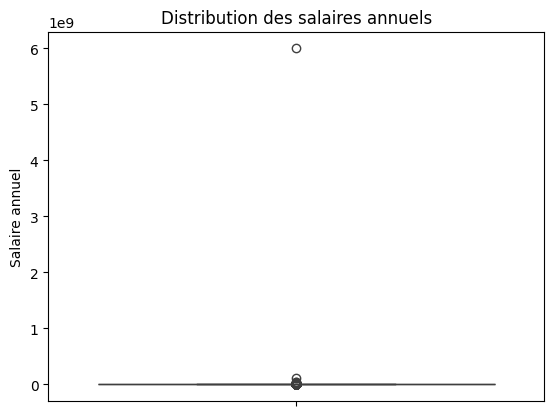

In [7]:
print("--- Valeurs manquantes par colonne ---\n")
print(important_data.isnull().sum())
seuil = important_data.shape[0] * 0.8
print(f"\nLe seuil de valeurs manquantes maximum par colonne est {seuil}\n")

print("--- Colonne avec plus de 80% de valeurs manquantes ---\n")

for col in important_data.columns:
    nbre_null = important_data[col].isnull().sum()
    if (nbre_null > seuil):
        print(f'La colonne {col} est problématique, elle contient {nbre_null} valeurs nulles')
sns.boxplot(y=important_data['Annual_Salary'])
plt.title('Distribution des salaires annuels')
plt.ylabel('Salaire annuel')
plt.show()

### Nettoyage des données

In [8]:

important_data['Currency'] = important_data.apply(
    lambda row: row['Other_Currency'] if row['Currency'] == 'Other' else row['Currency'],
    axis=1
)
important_data.drop(columns=['Other_Currency'], inplace=True)
print(important_data[important_data['Currency'].isnull()])
important_data['Currency'] = important_data['Currency'].fillna(important_data['Currency'].mode()[0])




         Age                              Industry                Job_Title  \
9344   45-54  Government and Public Administration  Contracts Administrator   
18843  18-24                           Health care   Microbiologist officer   
18882  25-34                     Computing or Tech             Data Analyst   
18904  45-54                               Mining           Office manager    
27959  18-24          Engineering or Manufacturing            Data Engineer   

      Currency  Annual_Salary        Country      Gender Total_Experience  \
9344       NaN            NaN  United States       Woman    11 - 20 years   
18843      NaN            NaN       Malaysia         Man   1 year or less   
18882      NaN            NaN       Malaysia  Non-binary      2 - 4 years   
18904      NaN            NaN           USA        Woman    11 - 20 years   
27959      NaN        10000.0          India         Man   1 year or less   

      Education_Level  
9344     Some college  
18843    Some 

### Uniformiser le nom des pays

In [9]:
country_mapping = {
    'United States': 'United States',
    'United Kingdom': 'United Kingdom',
    'US': 'United States',
    'USA': 'United States',
    'Canada': 'Canada',
    'United Kingdom ': 'United Kingdom',
    'usa': 'United States',
    'UK': 'United Kingdom',
    'Scotland ': 'United Kingdom',
    'U.S.': 'United States',
    'United States ': 'United States',
    'The Netherlands': 'Netherlands',
    'Australia ': 'Australia',
    'Spain': 'Spain',
    'us': 'United States',
    'Usa': 'United States',
    'England': 'United Kingdom',
    'finland': 'Finland',
    'United States of America': 'United States',
    'France': 'France',
    'United states': 'United States',
    'Scotland': 'United Kingdom',
    'USA ': 'United States',
    'United states ': 'United States',
    'Germany': 'Germany',
    'UK ': 'United Kingdom',
    'united states': 'United States',
    'Ireland': 'Ireland',
    'India': 'India',
    'Australia': 'Australia',
    'Uk': 'United Kingdom',
    'United States of America ': 'United States',
    'U.S. ': 'United States',
    'canada': 'Canada',
    'Canada ': 'Canada',
    'U.S>': 'United States',
    'ISA': 'Argentina',
    'Argentina': 'Argentina',
    'Great Britain ': 'United Kingdom',
    'US ': 'United States',
    'United State': 'United States',
    'U.S.A': 'United States',
    'Denmark': 'Denmark',
    'U.S.A.': 'United States',
    'America': 'United States',
    'Netherlands': 'Netherlands',
    'netherlands': 'Netherlands',
    'England ': 'United Kingdom',
    'united states of america': 'United States',
    'Ireland ': 'Ireland',
    'Switzerland': 'Switzerland',
    'Netherlands ': 'Netherlands',
    'Bermuda': 'Bermuda',
    'Us': 'United States',
    'The United States': 'United States',
    'United State of America': 'United States',
    'Germany ': 'Germany',
    'Malaysia': 'Malaysia',
    'Mexico ': 'Mexico',
    'United Stated': 'United States',
    'South Africa ': 'South Africa',
    'Belgium': 'Belgium',
    'Northern Ireland': 'United Kingdom',
    'u.s.': 'United States',
    'South Africa': 'South Africa',
    'UNITED STATES': 'United States',
    'united States': 'United States',
    'Sweden': 'Sweden',
    'Hong Kong': 'Hong Kong',
    'Kuwait': 'Kuwait',
    'Norway': 'Norway',
    'Sri lanka': 'Sri Lanka',
    'Contracts': 'Contracts',
    'USA-- Virgin Islands': 'United States',
    'United Statws': 'United States',
    'England/UK': 'United Kingdom',
    'U.S': 'United States',
    "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located": 'Income Assessment',
    'Unites States ': 'United States',
    'Usa ': 'United States',
    'U.S.A. ': 'United States',
    'England, UK.': 'United Kingdom',
    'Greece': 'Greece',
    'Japan': 'Japan',
    'U. S. ': 'United States',
    'Britain ': 'United Kingdom',
    'United Sates': 'United States',
    'Japan ': 'Japan',
    'Austria': 'Austria',
    'Brazil': 'Brazil',
    'Canada, Ottawa, ontario': 'Canada',
    'Global': 'Global',
    'Sweden ': 'Sweden',
    'United States of American ': 'United States',
    'FRANCE': 'France',
    'Uniited States': 'United States',
    'United Kingdom (England)': 'United Kingdom',
    'Worldwide (based in US but short term trips aroudn the world)': 'Global',
    'CANADA ': 'Canada',
    'Canadw': 'Canada',
    'Hungary': 'Hungary',
    'Luxembourg': 'Luxembourg',
    'United Sates of America': 'United States',
    'ireland': 'Ireland',
    'United States (I work from home and my clients are all over the US/Canada/PR': 'United States',
    'Colombia': 'Colombia',
    'CANADA': 'Canada',
    'Unted States': 'United States',
    'germany': 'Germany',
    'United Statesp': 'United States',
    'United Stattes': 'United States',
    'United Statea': 'United States',
    'United Kingdom.': 'United Kingdom',
    'Mexico': 'Mexico',
    'New Zealand': 'New Zealand',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'Unites States': 'United States',
    'United Statees': 'United States',
    'United kingdom': 'United Kingdom',
    'Cayman Islands': 'Cayman Islands',
    'UNited States': 'United States',
    'I am located in Canada but I work for a company in the US': 'Canada',
    'United kingdom ': 'United Kingdom',
    'Uniyed states': 'United States',
    'Uniyes States': 'United States',
    'United States of Americas': 'United States',
    'U.A.': 'UAE',
    'Czech republic': 'Czech Republic',
    'Czechia': 'Czech Republic',
    'Latvia': 'Latvia',
    'Finland': 'Finland',
    'U. S.': 'United States',
    'Puerto Rico': 'Puerto Rico',
    'US of A': 'United States',
    'Rwanda': 'Rwanda',
    'United States of america ': 'United States',
    'United Arab Emirates ': 'UAE',
    'Bangladesh ': 'Bangladesh',
    'Spain ': 'Spain',
    'U.K. ': 'United Kingdom',
    'Romania': 'Romania',
    'U.SA': 'United States',
    'United Kindom': 'United Kingdom',
    'United Status': 'United States',
    'New Zealand ': 'New Zealand',
    'Currently finance': 'Finance',
    ' U.S.': 'United States',
    'Serbia': 'Serbia',
    'Philippines': 'Philippines',
    'Russia ': 'Russia',
    'Poland': 'Poland',
    'czech republic': 'Czech Republic',
    'England, UK': 'United Kingdom',
    'Turkey': 'Turkey',
    'Canda': 'Canada',
    'Puerto Rico ': 'Puerto Rico',
    'Canada and USA': 'Canada',
    'Catalonia': 'Catalonia',
    '$2,175.84/year is deducted for benefits': 'Benefits',
    'uk': 'United Kingdom',
    'France ': 'France',
    'Italy (South)': 'Italy',
    'Jersey, Channel islands': 'Jersey',
    'Uk ': 'United Kingdom',
    'China': 'China',
    'Virginia': 'Virginia',
    'Afghanistan': 'Afghanistan',
    'Israel': 'Israel',
    'U.s.': 'United States',
    'Great Britain': 'United Kingdom',
    'U.s.a.': 'United States',
    'USS': 'United States',
    'Denmark ': 'Denmark',
    'Uniteed States': 'United States',
    'New Zealand Aotearoa': 'New Zealand',
    'U.K.': 'United Kingdom',
    'Hartford': 'Hartford',
    'Japan, US Gov position': 'Japan',
    'Csnada': 'Canada',
    'United Stares': 'United States',
    'new zealand': 'New Zealand',
    'Mainland China': 'China',
    'I.S.': 'I.S.',
    'UK (Northern Ireland)': 'United Kingdom',
    'UK for U.S. company': 'United Kingdom',
    ' US': 'United States',
    'Unites states ': 'United States',
    'NZ': 'New Zealand',
    'Us ': 'United States',
    'Hong Kong ': 'Hong Kong',
    'Taiwan': 'Taiwan',
    'Canad': 'Canada',
    'Unite States': 'United States',
    'australia': 'Australia',
    'The US': 'United States',
    'united states ': 'United States',
    'The Netherlands ': 'Netherlands',
    'Cambodia': 'Cambodia',
    'United states of America ': 'United States',
    'Vietnam': 'Vietnam',
    'Remote': 'Remote',
    'Singapore': 'Singapore',
    'South Korea': 'South Korea',
    'Czech Republic ': 'Czech Republic',
    'Thailand': 'Thailand',
    'Bangladesh': 'Bangladesh',
    'Lithuania': 'Lithuania',
    'Eritrea': 'Eritrea',
    'Indonesia': 'Indonesia',
    'Singapore ': 'Singapore',
    'For the United States government, but posted overseas': 'United States',
    'IS': 'IS',
    'Switzerland ': 'Switzerland',
    'United Kingdomk': 'United Kingdom',
    'Italy': 'Italy',
    ' New Zealand': 'New Zealand',
    'Cuba': 'Cuba',
    'Slovenia': 'Slovenia',
    'Australi': 'Australia',
    "Cote d'Ivoire": 'Cote d\'Ivoire',
    'united kingdom': 'United Kingdom',
    'From Romania, but for an US based company': 'United States',
    'Somalia': 'Somalia',
    'Wales (United Kingdom)': 'United Kingdom',
    'England, Gb': 'United Kingdom',
    'Czech Republic': 'Czech Republic',
    'UnitedStates': 'United States',
    'Sri Lanka': 'Sri Lanka',
    'spain': 'Spain',
    'Danmark': 'Denmark',
    'U.K. (northern England)': 'United Kingdom',
    'U.K': 'United Kingdom',
    'NL': 'Netherlands',
    'the Netherlands': 'Netherlands',
    'Nederland': 'Netherlands',
    'Slovakia': 'Slovakia',
    'United States of america': 'United States',
    'Portugal ': 'Portugal',
    'England, United Kingdom': 'United Kingdom',
    'Sierra Leone': 'Sierra Leone',
    'Englang': 'United Kingdom',
    'United statew': 'United States',
    'UAE': 'UAE',
    'Belgium ': 'Belgium',
    'bonus based on meeting yearly goals set w/ my supervisor': 'Bonus',
    'International ': 'International',
    'The Bahamas ': 'Bahamas',
    'Wales': 'United Kingdom',
    "I earn commission on sales. If I meet quota, I'm guaranteed another 16k min. Last year i earned an additional 27k. It's not uncommon for people in my space to earn 100k+ after commission. ": 'Commission',
    'Costa Rica': 'Costa Rica',
    ' United States': 'United States',
    'United Statues': 'United States',
    'Untied States': 'United States',
    'USA (company is based in a US territory, I work remote)': 'United States',
    'Chile': 'Chile',
    'denmark': 'Denmark',
    'UK (England)': 'United Kingdom',
    'UK, remote': 'United Kingdom',
    'Scotland, UK': 'United Kingdom',
    'USAB': 'United States',
    'Unitied States': 'United States',
    'Norway ': 'Norway',
    'Qatar': 'Qatar',
    'United Sttes': 'United States',
    'Remote (philippines)': 'Philippines',
    'Brazil ': 'Brazil',
    'Unites kingdom ': 'United Kingdom',
    'South africa': 'South Africa',
    'Portugal': 'Portugal',
    'united stated': 'United States',
    'United States Of America': 'United States',
    'Nigeria': 'Nigeria',
    'Panamá': 'Panama',
    'Northern Ireland ': 'United Kingdom',
    'england': 'United Kingdom',
    'SWITZERLAND': 'Switzerland',
    'Austria, but I work remotely for a Dutch/British company': 'Austria',
    "I work for an US based company but I'm from Argentina.": 'Argentina',
    'Uniter Statez': 'United States',
    'U. S ': 'United States',
    'Congo': 'Congo',
    'United states of America': 'United States',
    'Uruguay': 'Uruguay',
    'Pakistan': 'Pakistan',
    'Brasil': 'Brazil',
    'USA tomorrow ': 'United States',
    'United Stateds': 'United States',
    'singapore': 'Singapore',
    'US govt employee overseas, country withheld': 'United States',
    'usa ': 'United States',
    'Malaysia ': 'Malaysia',
    'Uganda': 'Uganda',
    'Malta': 'Malta',
    'Saudi Arabia': 'Saudi Arabia',
    'Bulgaria': 'Bulgaria',
    'Estonia': 'Estonia',
    'Morocco': 'Morocco',
    'new zealand': 'New Zealand',
    'Africa': 'Africa',
    'Ecuador': 'Ecuador',
    'Zimbabwe': 'Zimbabwe',
    'Ghana': 'Ghana',
    'San Francisco': 'California',
    'Usat': 'United States',
    '🇺🇸 ': 'United States',
    'Luxemburg': 'Luxembourg',
    'Unitef Stated': 'United States',
    'UA': 'UA',
    'Wales, UK': 'United Kingdom',
    'United Stares ': 'United States',
    'Croatia ': 'Croatia',
    'England, United Kingdom ': 'United Kingdom',
    'United STates': 'United States',
    'USaa': 'United States',
    'uSA': 'United States',
    'South Korea ': 'South Korea',
    'The netherlands': 'Netherlands',
    'Ukraine ': 'Ukraine',
    'america': 'United States',
    'switzerland': 'Switzerland',
    'United States- Puerto Rico': 'United States',
    'From New Zealand but on projects across APAC': 'New Zealand',
    'United y': 'United States',
    'Wales (UK)': 'United Kingdom',
    'Isle of Man': 'Isle of Man',
    'Northern Ireland, United Kingdom': 'United Kingdom',
    'europe': 'Europe',
    'California ': 'California',
    'UK, but for globally fully remote company': 'United Kingdom',
    'Australian ': 'Australia',
    'México': 'Mexico',
    'Jamaica': 'Jamaica',
    'uS': 'United States',
    'the netherlands': 'Netherlands',
    "USA, but for foreign gov't": 'United States',
    'japan': 'Japan',
    'Kenya': 'Kenya',
    'Jordan': 'Jordan',
    'United Statss': 'United States',
    'ARGENTINA BUT MY ORG IS IN THAILAND': 'Argentina',
    'United states of america': 'United States',
    'UsA': 'United States',
    'I work for a UAE-based organization, though I am personally in the US.': 'United States',
    'United  States': 'United States',
    'france': 'France',
    'Aotearoa New Zealand': 'New Zealand',
    'Policy': 'Policy',
    'Cyprus': 'Cyprus',
    'hong konh': 'Hong Kong',
    'United States is America': 'United States',
    'Liechtenstein': 'Liechtenstein',
    'Company in Germany. I work from Pakistan.': 'Germany',
    'croatia': 'Croatia',
    'Canadá': 'Canada',
    'ENGLAND': 'United Kingdom',
    'United States of American': 'United States',
    'U.S.A ': 'United States',
    'INDIA': 'India',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'NIGERIA': 'Nigeria',
    'Poland ': 'Poland',
    'pakistan': 'Pakistan',
    'Nigeria ': 'Nigeria',
    'London': 'London',
    'philippines': 'Philippines',
    'Myanmar': 'Myanmar',
    'Burma': 'Burma'
}



In [9]:
# pour chaque ligne du dataet, remplacer la donnée grace au mapping. si ca ne fait pas partir du mapping alors mettre other
important_data['Country'] = important_data['Country'].replace(country_mapping)
important_data['Country'] = important_data['Country'].where(important_data['Country'].isin(country_mapping.values()), 'Other')
print(important_data['Country'].unique())

['United States' 'United Kingdom' 'Canada' 'Netherlands' 'Australia'
 'Spain' 'Finland' 'France' 'Germany' 'Ireland' 'India' 'Argentina'
 'Denmark' 'Switzerland' 'Bermuda' 'Malaysia' 'Mexico' 'South Africa'
 'Belgium' 'Sweden' 'Hong Kong' 'Kuwait' 'Norway' 'Sri Lanka' 'Contracts'
 'Income Assessment' 'Greece' 'Japan' 'Austria' 'Brazil' 'Global'
 'Hungary' 'Luxembourg' 'Colombia' 'New Zealand' 'Trinidad and Tobago'
 'Cayman Islands' 'Other' 'UAE' 'Czech Republic' 'Latvia' 'Puerto Rico'
 'Rwanda' 'Bangladesh' 'Romania' 'Finance' 'Serbia' 'Philippines' 'Russia'
 'Poland' 'Turkey' 'Catalonia' 'Benefits' 'Italy' 'Jersey' 'China'
 'Virginia' 'Afghanistan' 'Israel' 'Hartford' 'I.S.' 'Taiwan' 'Cambodia'
 'Vietnam' 'Remote' 'Singapore' 'South Korea' 'Thailand' 'Lithuania'
 'Eritrea' 'Indonesia' 'IS' 'Cuba' 'Slovenia' "Cote d'Ivoire" 'Somalia'
 'Slovakia' 'Portugal' 'Sierra Leone' 'Bonus' 'International' 'Bahamas'
 'Commission' 'Costa Rica' 'Chile' 'Qatar' 'Nigeria' 'Panama' 'Congo'
 'Uruguay' '

#### Remplir ls valeurs manquantes de toutes les colonnes

In [10]:
# remplacer les valeurs manquantes dans 'Industry' par la catégorie le mode
important_data['Industry'] = important_data['Industry'].fillna(important_data['Industry'].mode()[0])
# remplacer les valeurs manquantes dans 'Job_Title' par la catégorie le mode
important_data['Job_Title'] = important_data['Job_Title'].fillna(important_data['Job_Title'].mode()[0])
# remplacer les valeurs manquantes dans 'Gender' par "Non spécifié"
important_data['Gender'] = important_data['Gender'].fillna('Non spécifié')
# remplacer les valeurs manquantes dans 'Education_Level' par "Non spécifié"
important_data['Education_Level'] = important_data['Education_Level'].fillna('Non spécifié')






#### Conversion en dollars des devises

In [11]:
from currency_converter import CurrencyConverter

converter = CurrencyConverter()

# fonction pour convertir en USD
def convert_salary_to_usd(row):
    salary = row['Annual_Salary']
    currency = row['Currency']
    country = row['Country']

    try:
        if currency == 'USD':
            return salary
        #si la première lettre du pays est A alors currency="AUD"
        elif currency == "AUD/NZD":
          if country[0] == 'A':
              return converter.convert(salary, "AUD", 'USD')
          elif country[0] == 'N':
              return converter.convert(salary, "NZD", 'USD')
        # si il existe un mot de trois lettres dans la chaine Currency alors récupérer ce mot
        elif len(currency.split()[0]) == 3:
          code_devise = currency.split()[0]
          code_devise = code_devise.upper()
          return converter.convert(salary, code_devise, 'USD')

    except Exception as e:

        print(f"Erreur lors de la conversion de {salary} {currency} {country} en USD: {e}")
        important_data.drop(row.name, inplace=True)
        print(f"Ligne supprimée: {row.name}")
        return None



important_data['Annual_Salary_USD'] = important_data.apply(convert_salary_to_usd, axis=1)
important_data['Annual_Salary_USD'] = pd.to_numeric(important_data['Annual_Salary_USD'], errors='coerce')
important_data = important_data.dropna(subset=['Annual_Salary_USD'])


print(important_data[['Annual_Salary', 'Currency', 'Annual_Salary_USD']].head())
print(important_data.isna().sum())

Erreur lors de la conversion de nan BR$ Brazil en USD: BR$ is not a supported currency
Ligne supprimée: 2639
Erreur lors de la conversion de nan TTD Trinidad and Tobago en USD: TTD is not a supported currency
Ligne supprimée: 4264
Erreur lors de la conversion de nan Bdt Bangladesh  en USD: BDT is not a supported currency
Ligne supprimée: 6765
Erreur lors de la conversion de nan NIS (new Israeli shekel) Israel en USD: NIS is not a supported currency
Ligne supprimée: 9847
Erreur lors de la conversion de nan RMB (chinese yuan) Mainland China en USD: RMB is not a supported currency
Ligne supprimée: 9955
Erreur lors de la conversion de nan LKR Sri Lanka en USD: LKR is not a supported currency
Ligne supprimée: 11913
Erreur lors de la conversion de nan ARS I work for an US based company but I'm from Argentina. en USD: ARS is not a supported currency
Ligne supprimée: 16210
Erreur lors de la conversion de nan SAR Saudi Arabia en USD: SAR is not a supported currency
Ligne supprimée: 18662
Erreur

#### Remplacement des valeurs de salaires aberrantes

In [12]:
# si le salaire est supérieur a 10000000 alors remplacer par la valeur médiane de la colonne
important_data.loc[important_data['Annual_Salary_USD'] > 10000000, 'Annual_Salary_USD'] = important_data['Annual_Salary_USD'].median()
important_data.loc[important_data['Annual_Salary'] > 10000000, 'Annual_Salary'] = important_data['Annual_Salary'].median()

In [13]:
print(important_data.isna().sum())

Age                  0
Industry             0
Job_Title            0
Currency             0
Annual_Salary        0
Country              0
Gender               0
Total_Experience     0
Education_Level      0
Annual_Salary_USD    0
dtype: int64


In [14]:
print('Submissions by Top 5 most represented countries, percent:')
(important_data['Country'].value_counts(normalize=True)*100).to_frame().head(5)


Submissions by Top 5 most represented countries, percent:


,proportion
Country,
United States,83.708950
Canada,5.241468
United Kingdom,4.533162
Australia,1.519639
Germany,0.824211


##### Je vais concentrer mon exploration sur les données spécifiques aux États-Unis, car elles représentent la majorité du dataset.

In [21]:
important_data["data_job"] = np.where(important_data["Job_Title"].str.contains('data|analytics|machine learning|ml|decision|insights|measurement|intelligence|predictive', regex= True, na=False), 'yes', 'no')
important_data.loc[important_data['data_job']=='yes'].head()

,Age,Industry,Job_Title,Currency,Annual_Salary,Country,Gender,Total_Experience,Education_Level,Annual_Salary_USD,data_job
20766,45-54,Education (Higher Education),Interim Director of Cataloging and Metadata Se...,USD,96000.0,United States,Woman,21 - 30 years,Master's degree,96000.000000,yes
21363,45-54,Government and Public Administration,Business intelligence lead,CAD,72000.0,Canada,Woman,8 - 10 years,College degree,50814.127144,yes
21454,25-34,Art & Design,data associate,USD,46000.0,United States,Woman,11 - 20 years,College degree,46000.000000,yes
21468,45-54,Computing or Tech,data scientist,USD,168000.0,United States,Man,21 - 30 years,"Professional degree (MD, JD, etc.)",168000.000000,yes
21483,35-44,Engineering or Manufacturing,data scientist,USD,130000.0,United States,Man,5-7 years,Master's degree,130000.000000,yes


In [22]:
important_data_usa = important_data.loc[important_data['Country']=='United States']

In [23]:
avg_non = important_data_usa.loc[important_data_usa['data_job']=='no']['Annual_Salary'].mean()
avg_data = important_data_usa.loc[important_data_usa['data_job']=='yes']['Annual_Salary'].mean()
lift = (avg_data-avg_non)/avg_non

print('Average salary:\n')
print(important_data_usa.groupby('data_job')['Annual_Salary'].mean())
print('\nData jobs paid', round(lift*100,1), '% more')

Average salary:

data_job
no      93262.075297
yes    114580.421053
Name: Annual_Salary, dtype: float64

Data jobs paid 22.9 % more


In [24]:
(important_data_usa.groupby('data_job')['Age'].value_counts(normalize=True)*100).to_frame()

proportion
data_job Age                   
no       25-34        44.777041
         35-44        35.164326
         45-54        10.368770
         18-24         5.662706
         55-64         3.703132
         65 or over    0.246875
         under 18      0.077149
yes      35-44        47.368421
         25-34        31.578947
         45-54        10.526316
         55-64        10.526316

In [25]:
(important_data_usa['Industry'].value_counts(normalize=True)*100).to_frame().head(10)

,proportion
Industry,
Computing or Tech,16.261538
Health care,8.353846
Nonprofits,7.876923
Education (Higher Education),7.830769
Engineering or Manufacturing,7.261538
"Accounting, Banking & Finance",6.676923
Government and Public Administration,4.938462
"Marketing, Advertising & PR",4.138462
Law,3.800000


In [26]:
(important_data_usa.groupby('data_job')['Total_Experience'].value_counts(normalize=True)*100).to_frame()

proportion
data_job Total_Experience            
no       11 - 20 years      34.423700
         8 - 10 years       18.731677
         5-7 years          17.250424
         21 - 30 years      12.050609
         2 - 4 years        11.772875
         31 - 40 years       2.993365
         1 year or less      2.391606
         41 years or more    0.385743
yes      11 - 20 years      52.631579
         21 - 30 years      15.789474
         2 - 4 years        10.526316
         5-7 years          10.526316
         31 - 40 years       5.263158
         8 - 10 years        5.263158

In [27]:
(important_data_usa[important_data_usa['data_job']=='yes']['Education_Level'].value_counts(normalize=True)*100).to_frame().head(10)

,proportion
Education_Level,
Master's degree,63.157895
College degree,21.052632
PhD,10.526316
"Professional degree (MD, JD, etc.)",5.263158


In [28]:
(important_data_usa.groupby('data_job')['Gender'].value_counts(normalize=True)*100).to_frame()

proportion
data_job Gender                                   
no       Woman                           75.281592
         Man                             20.722111
         Non-binary                       2.160160
         Other or prefer not to answer    1.095510
         Non spécifié                     0.740626
yes      Woman                           57.894737
         Man                             42.105263

In [29]:
job_title_keywords = ('data', 'analytics', 'data analyst', 'data scientist','machine learning', 'ml', 'decision', 
                      'insights', 'reporting', 
                     'measurement', 'intelligence', 'BI', 'dashboard', 'SQL', 'applied scientist', 'forecasting',
                     'predictive', 'prediction', 'artificial')

In [59]:
for keyword in job_title_keywords:
    print('Job titles that  contains "'+keyword+'"', important_data_usa['Job_Title'].str.contains(keyword).sum())

Job titles that  contains "data" 14
Job titles that  contains "analytics" 3
Job titles that  contains "data analyst" 3
Job titles that  contains "data scientist" 3
Job titles that  contains "machine learning" 0
Job titles that  contains "ml" 0
Job titles that  contains "decision" 0
Job titles that  contains "insights" 2
Job titles that  contains "reporting" 1
Job titles that  contains "measurement" 0
Job titles that  contains "intelligence" 0
Job titles that  contains "BI" 2
Job titles that  contains "dashboard" 0
Job titles that  contains "SQL" 2
Job titles that  contains "applied scientist" 0
Job titles that  contains "forecasting" 0
Job titles that  contains "predictive" 0
Job titles that  contains "prediction" 0
Job titles that  contains "artificial" 0


In [31]:

important_data_usa["job family"] = np.where(important_data_usa["Job_Title"].str.contains('data scientist', regex= True, na=False), 'data scientist', 
                                 np.where(important_data_usa["Job_Title"].str.contains('analyst', regex= True, na=False), 'data analyst', 
                                 np.where(important_data_usa["Job_Title"].str.contains('analysis', regex= True, na=False), 'data analyst', 
                                 np.where(important_data_usa["Job_Title"].str.contains('engineer', regex= True, na=False), 'data engineer', 
                                 np.where(important_data_usa["Job_Title"].str.contains('developer', regex= True, na=False), 'data engineer', 
                                 np.where(important_data_usa["Job_Title"].str.contains('architect', regex= True, na=False), 'data engineer', 
                                 np.where(important_data_usa["Job_Title"].str.contains('business intelligence', regex= True, na=False), 'business intelligence', 
                                 np.where(important_data_usa["Job_Title"].str.contains('visualization', regex= True, na=False), 'business intelligence', 
                                 np.where(important_data_usa["Job_Title"].str.contains('database', regex= True, na=False), 'database', 
                                 np.where(important_data_usa["Job_Title"].str.contains('analytics', regex= True, na=False), 'analytics', 
                                 np.where(important_data_usa["Job_Title"].str.contains('machine learning', regex= True, na=False), 'machine learning', 
                                 np.where(important_data_usa["Job_Title"].str.contains('data science', regex= True, na=False), 'data scientist',
                                 np.where(important_data_usa["Job_Title"].str.contains('science', regex= True, na=False), 'data scientist',
                                 np.where(important_data_usa["Job_Title"].str.contains('scientist', regex= True, na=False), 'data scientist',
                                 np.where(important_data_usa["Job_Title"].str.contains('governance', regex= True, na=False), 'data governance',
                                 np.where(important_data_usa["Job_Title"].str.contains('quality', regex= True, na=False), 'data governance',
                                 np.where(important_data_usa["Job_Title"].str.contains('integrity', regex= True, na=False), 'data governance',
                                 np.where(important_data_usa["Job_Title"].str.contains('intelligence', regex= True, na=False), 'intelligence',
                                 np.where(important_data_usa["Job_Title"].str.contains('consultant', regex= True, na=False), 'consultant',
                                 np.where(important_data_usa["Job_Title"].str.contains('modeling', regex= True, na=False), 'data scientist',
                                 np.where(important_data_usa["Job_Title"].str.contains('entry', regex= True, na=False), 'data entry',
                                 np.where(important_data_usa["Job_Title"].str.contains('clerk', regex= True, na=False), 'data entry',
                                 np.where(important_data_usa["Job_Title"].str.contains('collection', regex= True, na=False), 'data entry',
                                 np.where(important_data_usa["Job_Title"].str.contains('insights', regex= True, na=False), 'data analyst', 
                                 np.where(important_data_usa["Job_Title"].str.contains('processor', regex= True, na=False), 'data analyst', 
                                 np.where(important_data_usa["Job_Title"].str.contains('informatics', regex= True, na=False), 'informatics', 
                                 np.where(important_data_usa["Job_Title"].str.contains('specialist', regex= True, na=False), 'data analyst', 
                                          'other')))))))))))))))))))))))))))

C:\Users\EL mahjoubi\AppData\Local\Temp\ipykernel_1560\2771655082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_data_usa["job family"] = np.where(important_data_usa["Job_Title"].str.contains('data scientist', regex= True, na=False), 'data scientist',


In [50]:
important_data_usa['job family'].value_counts()

job family
other                    6252
data engineer             111
data analyst               84
data scientist             24
consultant                 20
analytics                   3
informatics                 2
data entry                  2
business intelligence       1
data governance             1
Name: count, dtype: int64

## Text Data Processing: text mining for textual target variable 

##### Tokenisation et Lemmatisation

In [17]:
import nltk
nltk.data.clear_cache()


In [22]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk_data_path = os.path.join(os.getcwd(), "nltk_data")
nltk.data.path.append(nltk_data_path)
nltk.download('punkt_tab', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)

lemmatizer = WordNetLemmatizer()
stop_words = set(nltk.corpus.stopwords.words('english'))
def preprocess_text_lemmatisation(text):
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(lemmatized_tokens)


[nltk_data] Downloading package punkt_tab to c:\Users\EL
[nltk_data]     mahjoubi\Desktop\enquete salaire project\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to c:\Users\EL
[nltk_data]     mahjoubi\Desktop\enquete salaire project\nltk_data...
[nltk_data] Downloading package stopwords to c:\Users\EL
[nltk_data]     mahjoubi\Desktop\enquete salaire project\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
important_data['Processed_Job_Title_Lemmatisation'] = important_data['Job_Title'].apply(preprocess_text_lemmatisation)
important_data['Processed_Industry_Lemmatisation'] = important_data['Industry'].apply(preprocess_text_lemmatisation)

print(important_data)

              Age                              Industry  \
97          55-64              Environmental regulation   
166         25-34                           Health care   
895         45-54         Education (Primary/Secondary)   
968         25-34                       Media & Digital   
1607        25-34               Agriculture or Forestry   
...           ...                                   ...   
28080       45-54         Accounting, Banking & Finance   
28081       45-54         Education (Primary/Secondary)   
28082       55-64  Government and Public Administration   
28083       18-24                     Computing or Tech   
28084  65 or over                       Social networks   

                        Job_Title Currency  Annual_Salary        Country  \
97         Quality Assurance Lead      USD           58.0  United States   
166        occupational therapist      EUR           35.0        Finland   
895     Special Education Teacher      USD           38.0  Unit

#### Tokenisation et Stemming


In [40]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text_stemming(text):
    tokens = word_tokenize(text.lower())
    stemmed_tokens = [stemmer.stem(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(stemmed_tokens)

important_data['Processed_Job_Title_Stemming'] = important_data['Job_Title'].apply(preprocess_text_stemming)
important_data['Processed_Industry_Stemming'] = important_data['Industry'].apply(preprocess_text_stemming)

print(important_data)

              Age                              Industry  \
97          55-64              Environmental regulation   
166         25-34                           Health care   
895         45-54         Education (Primary/Secondary)   
968         25-34                       Media & Digital   
1607        25-34               Agriculture or Forestry   
...           ...                                   ...   
28080       45-54         Accounting, Banking & Finance   
28081       45-54         Education (Primary/Secondary)   
28082       55-64  Government and Public Administration   
28083       18-24                     Computing or Tech   
28084  65 or over                       Social networks   

                        Job_Title Currency  Annual_Salary        Country  \
97         Quality Assurance Lead      USD           58.0  United States   
166        occupational therapist      EUR           35.0        Finland   
895     Special Education Teacher      USD           38.0  Unit

#### Tokenisation et Données brutes


In [41]:
def preprocess_text_brutes(text):
    tokens = word_tokenize(text.lower())
    return ' '.join(tokens)


important_data['Processed_Job_Title_Brutes'] = important_data['Job_Title'].apply(preprocess_text_brutes)
important_data['Processed_Industry_Brutes'] = important_data['Industry'].apply(preprocess_text_brutes)
print(important_data)

              Age                              Industry  \
97          55-64              Environmental regulation   
166         25-34                           Health care   
895         45-54         Education (Primary/Secondary)   
968         25-34                       Media & Digital   
1607        25-34               Agriculture or Forestry   
...           ...                                   ...   
28080       45-54         Accounting, Banking & Finance   
28081       45-54         Education (Primary/Secondary)   
28082       55-64  Government and Public Administration   
28083       18-24                     Computing or Tech   
28084  65 or over                       Social networks   

                        Job_Title Currency  Annual_Salary        Country  \
97         Quality Assurance Lead      USD           58.0  United States   
166        occupational therapist      EUR           35.0        Finland   
895     Special Education Teacher      USD           38.0  Unit


##### Convert the Job_Title column into categories using NLP techniques like TF-IDF or word embeddings.

In [42]:
tfidf_vectorizer = TfidfVectorizer()
X_job_title_lem = tfidf_vectorizer.fit_transform(important_data['Processed_Job_Title_Lemmatisation'])


job_title_df_lem = pd.DataFrame(X_job_title_lem.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(job_title_df_lem.head())

X_industry_lem = tfidf_vectorizer.fit_transform(important_data['Processed_Industry_Lemmatisation'])

industry_df_lem = pd.DataFrame(X_industry_lem.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(industry_df_lem.head())



   1st   24  250000   2d   3d  3rd  6th  7th  911  aba  ...  workplace  \
0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
1  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
2  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
3  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   
4  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0   

   worship  writer  writing  yard  year  yield  youth  zoo  zookeeper  
0      0.0     0.0      0.0   0.0   0.0    0.0    0.0  0.0        0.0  
1      0.0     0.0      0.0   0.0   0.0    0.0    0.0  0.0        0.0  
2      0.0     0.0      0.0   0.0   0.0    0.0    0.0  0.0        0.0  
3      0.0     0.0      0.0   0.0   0.0    0.0    0.0  0.0        0.0  
4      0.0     0.0      0.0   0.0   0.0    0.0    0.0  0.0        0.0  

[5 rows x 1478 columns]
    20  academia  academic  accounting  adjacent  administration  adult  \
0  0.0       0.0       

In [43]:
X_job_title_stem = tfidf_vectorizer.fit_transform(important_data['Processed_Job_Title_Stemming'])


job_title_df_stem = pd.DataFrame(X_job_title_stem.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(job_title_df_stem.head())

X_industry_stem = tfidf_vectorizer.fit_transform(important_data['Processed_Industry_Stemming'])

industry_df_stem = pd.DataFrame(X_industry_stem.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(industry_df_stem.head())

   1st   24  250000   2d   3d  3rd  6th  7th  911  aba  ...  workplac  \
0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
1  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
2  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
3  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   
4  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...       0.0   

   worship  write  writer  yard  year  yield  youth  zoo  zookeep  
0      0.0    0.0     0.0   0.0   0.0    0.0    0.0  0.0      0.0  
1      0.0    0.0     0.0   0.0   0.0    0.0    0.0  0.0      0.0  
2      0.0    0.0     0.0   0.0   0.0    0.0    0.0  0.0      0.0  
3      0.0    0.0     0.0   0.0   0.0    0.0    0.0  0.0      0.0  
4      0.0    0.0     0.0   0.0   0.0    0.0    0.0  0.0      0.0  

[5 rows x 1353 columns]
    20  academ  academia  account  adjac  administr  adult  advertis  advisor  \
0  0.0     0.0       0.0      0.0    0.0       

In [44]:
X_job_title_brut = tfidf_vectorizer.fit_transform(important_data['Processed_Job_Title_Brutes'])


job_title_df_brut = pd.DataFrame(X_job_title_brut.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(job_title_df_brut.head())

X_industry_brut = tfidf_vectorizer.fit_transform(important_data['Processed_Industry_Brutes'])

industry_df_brut = pd.DataFrame(X_industry_brut.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(industry_df_brut.head())

   1st   24  250000   2d   3d  3rd  6th  7th  911  aba  ...  worship  writer  \
0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0     0.0   
1  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0     0.0   
2  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0     0.0   
3  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0     0.0   
4  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...      0.0     0.0   

   writing  yard  year  years  yield  youth  zoo  zookeeper  
0      0.0   0.0   0.0    0.0    0.0    0.0  0.0        0.0  
1      0.0   0.0   0.0    0.0    0.0    0.0  0.0        0.0  
2      0.0   0.0   0.0    0.0    0.0    0.0  0.0        0.0  
3      0.0   0.0   0.0    0.0    0.0    0.0  0.0        0.0  
4      0.0   0.0   0.0    0.0    0.0    0.0  0.0        0.0  

[5 rows x 1598 columns]
    20  academia  academic  accounting  adjacent  administration  adult  \
0  0.0       0.0       0.0         0.0       0.

### Encodage des Colonnes Categorical

Transformation des  données non numériques en données numériques.
Pour les données à choix multiples, on peut labeliser les réponses de l'utilisateur afin d'obtenir des valeurs numériques.

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
important_data['Gender_Encoded'] = encoder.fit_transform(important_data['Gender'])
important_data['Age_Encoded'] = encoder.fit_transform(important_data['Age'])
important_data['Country_Encoded'] = encoder.fit_transform(important_data['Country'])


important_data['Total_Experience_Encoded'] = encoder.fit_transform(important_data['Total_Experience'])
important_data['Education_Level_Encoded'] = encoder.fit_transform(important_data['Education_Level'])


In [46]:
print(important_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7765 entries, 97 to 28084
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7765 non-null   object 
 1   Industry                           7765 non-null   object 
 2   Job_Title                          7765 non-null   object 
 3   Currency                           7765 non-null   object 
 4   Annual_Salary                      7765 non-null   float64
 5   Country                            7765 non-null   object 
 6   Gender                             7765 non-null   object 
 7   Total_Experience                   7765 non-null   object 
 8   Education_Level                    7765 non-null   object 
 9   Annual_Salary_USD                  7765 non-null   float64
 10  Processed_Job_Title_Lemmatisation  7765 non-null   object 
 11  Processed_Industry_Lemmatisation   7765 non-null   object 


In [47]:
important_data['Job_Title_Encoded'] = X_job_title_lem.sum(axis=1)
important_data['Industry_Encoded'] = X_industry_lem.sum(axis=1)
print(important_data[['Job_Title_Encoded', 'Industry_Encoded']].head())

      Job_Title_Encoded  Industry_Encoded
97             1.721491          1.393940
166            1.409892          1.414213
895            1.714590          1.000000
968            1.408149          1.414213
1607           1.722716          1.414214


Les colonnes Job_Title_Encoded et Industry_Encoded contiennent des scores TF-IDF, qui mesurent l'importance des mots dans les noms de postes et les industries. Plus le score est élevé, plus les mots associés sont rares ou significatifs dans le dataset global.


Ces encodages numériques peuvent désormais être utilisés comme des caractéristiques pour les algorithmes de machine learning, permettant aux modèles de comprendre l'importance des intitulés de postes et des industries.

### Analyse des 3 approches: 

#### Linear Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_job_title_lem, important_data['Annual_Salary_USD'], test_size=0.2, random_state=42)

model_l = LinearRegression()
model_l.fit(X_train_l, y_train_l)

y_pred_l = model_l.predict(X_test_l)

mse_l = mean_squared_error(y_test_l, y_pred_l)
r2_l = r2_score(y_test_l, y_pred_l)

print(f"Mean Squared Error: {mse_l:.2f}")
print(f"R² Score: {r2_l:.2f}")


Mean Squared Error: 21350437933.88
R² Score: 0.03


In [28]:

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_job_title_stem, important_data['Annual_Salary_USD'], test_size=0.2, random_state=42)

model_s = LinearRegression()
model_s.fit(X_train_s, y_train_s)

y_pred_s = model_s.predict(X_test_s)

mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

print(f"Mean Squared Error: {mse_s:.2f}")
print(f"R² Score: {r2_s:.2f}")


Mean Squared Error: 21479422346.35
R² Score: 0.02


In [29]:

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_job_title_brut, important_data['Annual_Salary_USD'], test_size=0.2, random_state=42)

model_b = LinearRegression()
model_b.fit(X_train_b, y_train_b)

y_pred_b = model_b.predict(X_test_b)

mse_b = mean_squared_error(y_test_b, y_pred_b)
r2_b = r2_score(y_test_b, y_pred_b)

print(f"Mean Squared Error: {mse_b:.2f}")
print(f"R² Score: {r2_b:.2f}")


Mean Squared Error: 21335399595.72
R² Score: 0.03


### Kmeans (clustering)

#### Industry

For n_clusters = 2, the silhouette score is 0.1409
For n_clusters = 7, the silhouette score is 0.4292
For n_clusters = 12, the silhouette score is 0.6499
For n_clusters = 17, the silhouette score is 0.7651
For n_clusters = 22, the silhouette score is 0.8357
For n_clusters = 27, the silhouette score is 0.9245


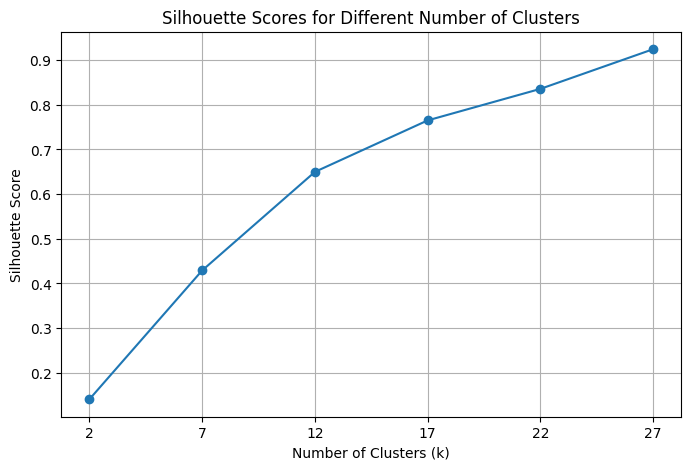

In [30]:
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_scores = []
range_k = range(2, 30,5)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_industry_stem)
    silhouette_avg = silhouette_score(X_industry_stem, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range_k)
plt.grid()
plt.show()


#### Job Title

For n_clusters = 2, the silhouette score is 0.0136
For n_clusters = 27, the silhouette score is 0.1215
For n_clusters = 52, the silhouette score is 0.1455
For n_clusters = 77, the silhouette score is 0.1769
For n_clusters = 102, the silhouette score is 0.1932
For n_clusters = 127, the silhouette score is 0.2170
For n_clusters = 152, the silhouette score is 0.2366
For n_clusters = 177, the silhouette score is 0.2456
For n_clusters = 202, the silhouette score is 0.2627
For n_clusters = 227, the silhouette score is 0.2754
For n_clusters = 252, the silhouette score is 0.2888
For n_clusters = 277, the silhouette score is 0.2987


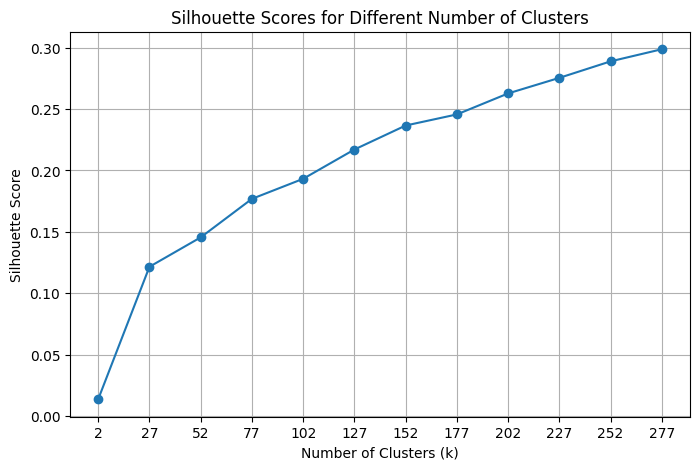

In [31]:
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_scores = []
range_k = range(2, 300,25)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_job_title_stem)
    silhouette_avg = silhouette_score(X_job_title_stem, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range_k)
plt.grid()
plt.show()


#### Lemmatisation

##### Industry

For n_clusters = 2, the silhouette score is 0.1402
For n_clusters = 7, the silhouette score is 0.4959
For n_clusters = 12, the silhouette score is 0.7537
For n_clusters = 17, the silhouette score is 0.8252
For n_clusters = 22, the silhouette score is 0.8369
For n_clusters = 27, the silhouette score is 0.9247


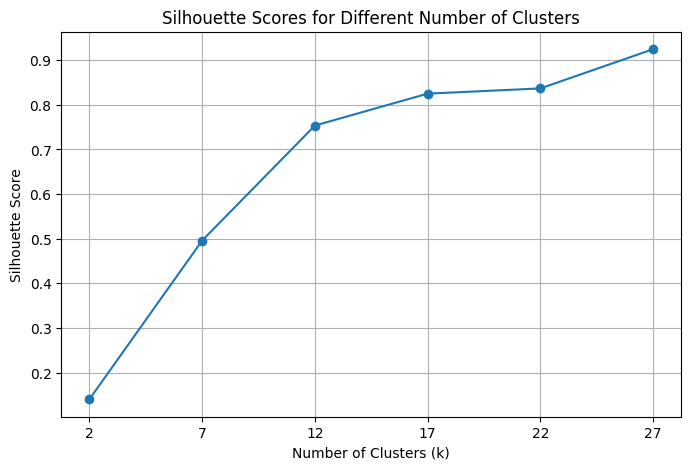

In [33]:
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_scores = []
range_k = range(2, 30,5)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_industry_lem)
    silhouette_avg = silhouette_score(X_industry_lem, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range_k)
plt.grid()
plt.show()


##### Job Title

For n_clusters = 2, the silhouette score is 0.0246
For n_clusters = 27, the silhouette score is 0.1052
For n_clusters = 52, the silhouette score is 0.1309
For n_clusters = 77, the silhouette score is 0.1640
For n_clusters = 102, the silhouette score is 0.1894
For n_clusters = 127, the silhouette score is 0.2118
For n_clusters = 152, the silhouette score is 0.2298
For n_clusters = 177, the silhouette score is 0.2412
For n_clusters = 202, the silhouette score is 0.2523
For n_clusters = 227, the silhouette score is 0.2656
For n_clusters = 252, the silhouette score is 0.2821
For n_clusters = 277, the silhouette score is 0.2979


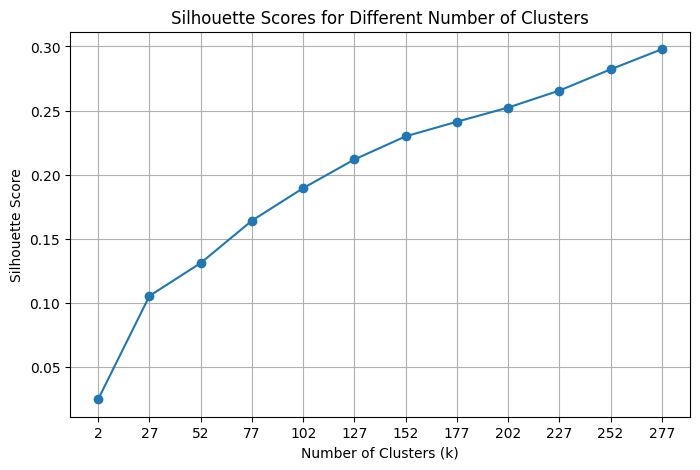

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
range_k = range(2, 300,25)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_job_title_lem)
    silhouette_avg = silhouette_score(X_job_title_lem, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range_k)
plt.grid()
plt.show()


#### Données brutes

##### Industry

For n_clusters = 2, the silhouette score is 0.1928
For n_clusters = 7, the silhouette score is 0.5010
For n_clusters = 12, the silhouette score is 0.7227
For n_clusters = 17, the silhouette score is 0.8118
For n_clusters = 22, the silhouette score is 0.8602
For n_clusters = 27, the silhouette score is 0.8941


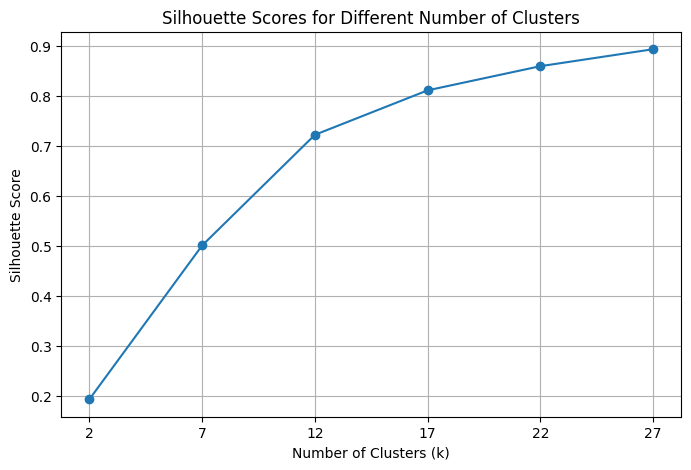

In [35]:
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


silhouette_scores = []
range_k = range(2, 30,5)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_industry_brut)
    silhouette_avg = silhouette_score(X_industry_brut, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range_k)
plt.grid()
plt.show()


#### Job Title

For n_clusters = 2, the silhouette score is 0.0226
For n_clusters = 27, the silhouette score is 0.1139
For n_clusters = 52, the silhouette score is 0.1623
For n_clusters = 77, the silhouette score is 0.1821
For n_clusters = 102, the silhouette score is 0.1936
For n_clusters = 127, the silhouette score is 0.2034
For n_clusters = 152, the silhouette score is 0.2172
For n_clusters = 177, the silhouette score is 0.2257
For n_clusters = 202, the silhouette score is 0.2416
For n_clusters = 227, the silhouette score is 0.2542
For n_clusters = 252, the silhouette score is 0.2628
For n_clusters = 277, the silhouette score is 0.2737


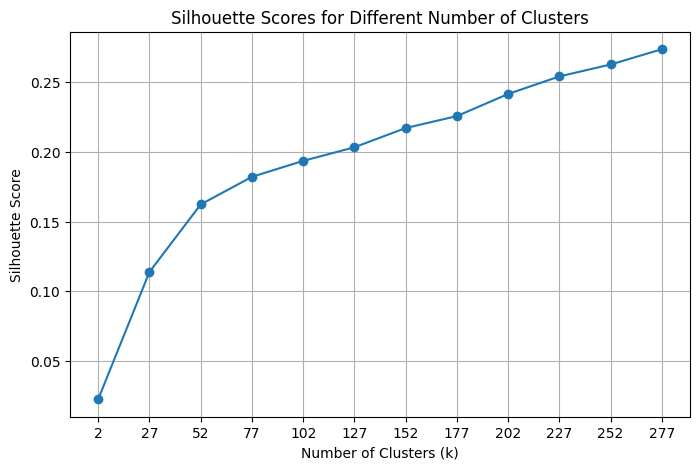

In [36]:


silhouette_scores = []
range_k = range(2, 300,25)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_job_title_brut)
    silhouette_avg = silhouette_score(X_job_title_brut, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range_k)
plt.grid()
plt.show()


### Clustering et Réduction de Dimension pour les Tâches Non Supervisées

- Appliquer des algorithmes de clustering
- Utiliser des techniques de réduction de dimension pour visualiser et comprendre les relations dans le jeu de données.

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
X_reduced = pca.fit_transform(X_job_title_lem.toarray())


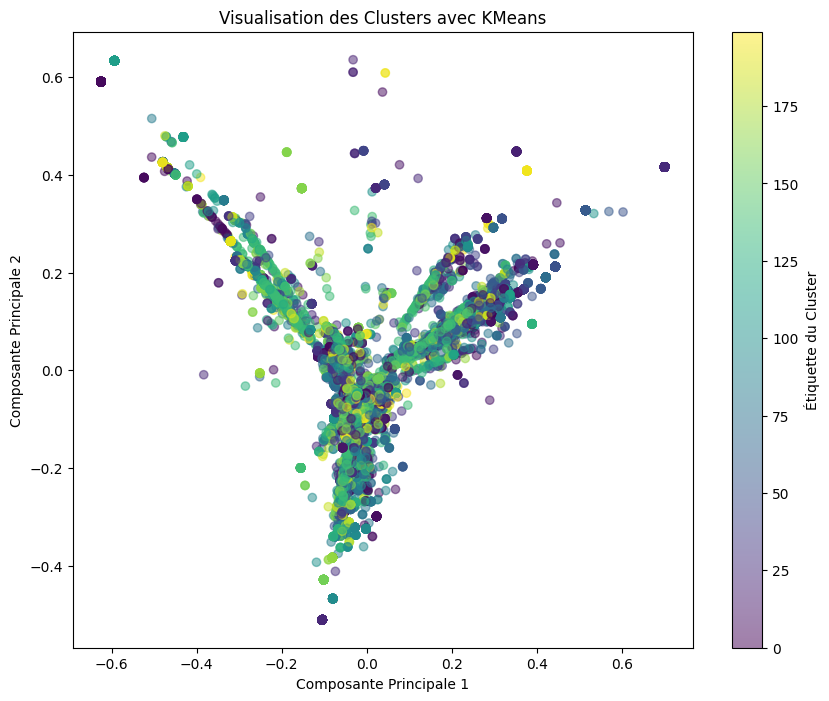

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

k = 200
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_job_title_lem)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.title('Visualisation des Clusters avec KMeans')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.colorbar(scatter, label='Étiquette du Cluster')
plt.show()


In [42]:
from sklearn.cluster import KMeans

kmeans_industry = KMeans(n_clusters=27, random_state=42)
important_data['Industry_Cluster'] = kmeans_industry.fit_predict(X_industry_lem)
kmeans_job = KMeans(n_clusters=200, random_state=42)
important_data['Job_Title_Cluster'] = kmeans_job.fit_predict(X_job_title_lem)
print(important_data[['Job_Title', 'Job_Title_Cluster', 'Industry', 'Industry_Cluster']].head())


                                  Job_Title  Job_Title_Cluster  \
0        Research and Instruction Librarian                 46   
1  Change & Internal Communications Manager                 99   
2                      Marketing Specialist                198   
3                           Program Manager                 50   
4                        Accounting Manager                190   

                        Industry  Industry_Cluster  
0   Education (Higher Education)                 0  
1              Computing or Tech                 1  
2  Accounting, Banking & Finance                 4  
3                     Nonprofits                 2  
4  Accounting, Banking & Finance                 4  


In [43]:
important_data[important_data['Industry_Cluster'] == 1]
# voir Industry unique where Industry_Cluster=1
print(important_data[important_data['Industry_Cluster'] == 1]['Industry'].unique())

['Computing or Tech' 'Tech']


In [45]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1, min_samples=2)
important_data['Industry_Cluster_DBSCAN'] = dbscan.fit_predict(X_industry_stem)
important_data['Job_Title_Cluster_DBSCAN'] = dbscan.fit_predict(X_job_title_stem)


In [46]:
print(important_data[['Job_Title', 'Industry_Cluster_DBSCAN', 'Industry', 'Job_Title_Cluster_DBSCAN']].head())
# nbre de valeures différentes count DBSCAN
print(important_data['Industry_Cluster_DBSCAN'].value_counts())
print(important_data['Job_Title_Cluster_DBSCAN'].value_counts())

                                  Job_Title  Industry_Cluster_DBSCAN  \
0        Research and Instruction Librarian                        0   
1  Change & Internal Communications Manager                        1   
2                      Marketing Specialist                        2   
3                           Program Manager                        3   
4                        Accounting Manager                        2   

                        Industry  Job_Title_Cluster_DBSCAN  
0   Education (Higher Education)                         0  
1              Computing or Tech                        -1  
2  Accounting, Banking & Finance                         1  
3                     Nonprofits                         2  
4  Accounting, Banking & Finance                         3  
Industry_Cluster_DBSCAN
1      4770
0      2463
3      2418
7      1893
11     1888
       ... 
98        2
174       2
101       2
102       2
239       2
Name: count, Length: 241, dtype: int64
Job_Ti

#### Nuages de mots

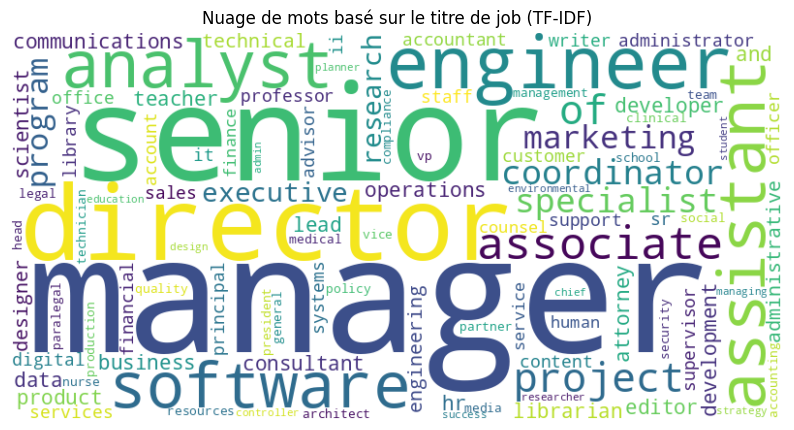

In [47]:
from wordcloud import WordCloud


term_frequencies_job = job_title_df_brut.sum().sort_values(ascending=False)

word_freq_dict_job = term_frequencies_job.to_dict()

wordcloud_job = WordCloud(width=800, height=400, background_color="white", max_words=100).generate_from_frequencies(word_freq_dict_job)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_job, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur le titre de job (TF-IDF)")
plt.show()

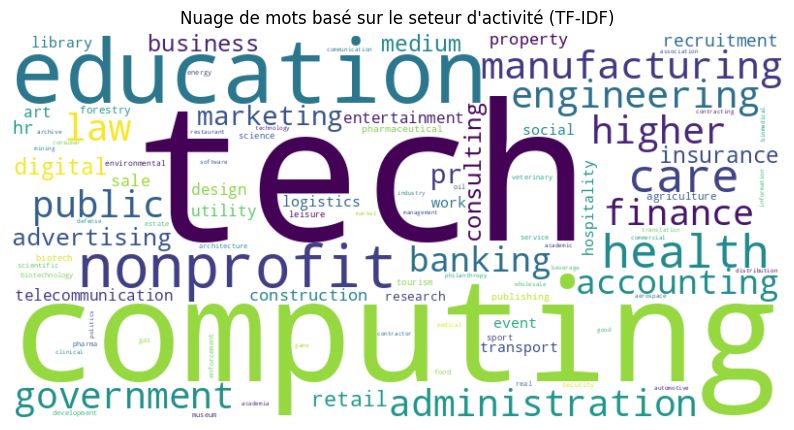

In [48]:

term_frequencies_industry = industry_df_lem.sum().sort_values(ascending=False)

word_freq_dict_industry = term_frequencies_industry.to_dict()

wordcloud_industry = WordCloud(width=800, height=400, background_color="white", max_words=100).generate_from_frequencies(word_freq_dict_industry)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_industry, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots basé sur le seteur d'activité (TF-IDF)")
plt.show()


### Manifold learning

In [49]:
from sklearn.manifold import Isomap, locally_linear_embedding, TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
X_combined = important_data[['Gender_Encoded', 'Age_Encoded', 'Country_Encoded',
                               'Annual_Salary_USD', 'Total_Experience_Encoded',
                               'Education_Level_Encoded', 'Job_Title_Cluster',
                               'Industry_Cluster']]
sample_size = 5000
X_combined


,Gender_Encoded,Age_Encoded,Country_Encoded,Annual_Salary_USD,Total_Experience_Encoded,Education_Level_Encoded,Job_Title_Cluster,Industry_Cluster
0,5,1,111,55000.000000,6,2,46,0
1,2,1,110,73172.091019,7,0,99,1
2,5,1,111,34000.000000,2,0,198,4
3,5,1,111,62000.000000,7,0,50,2
4,5,1,111,60000.000000,7,0,190,4
...,...,...,...,...,...,...,...,...
28079,5,2,111,53060.000000,3,6,115,3
28080,5,3,111,117000.000000,1,0,9,4
28081,5,3,111,70000.000000,3,2,118,25
28082,0,4,53,32020.560000,3,5,176,8


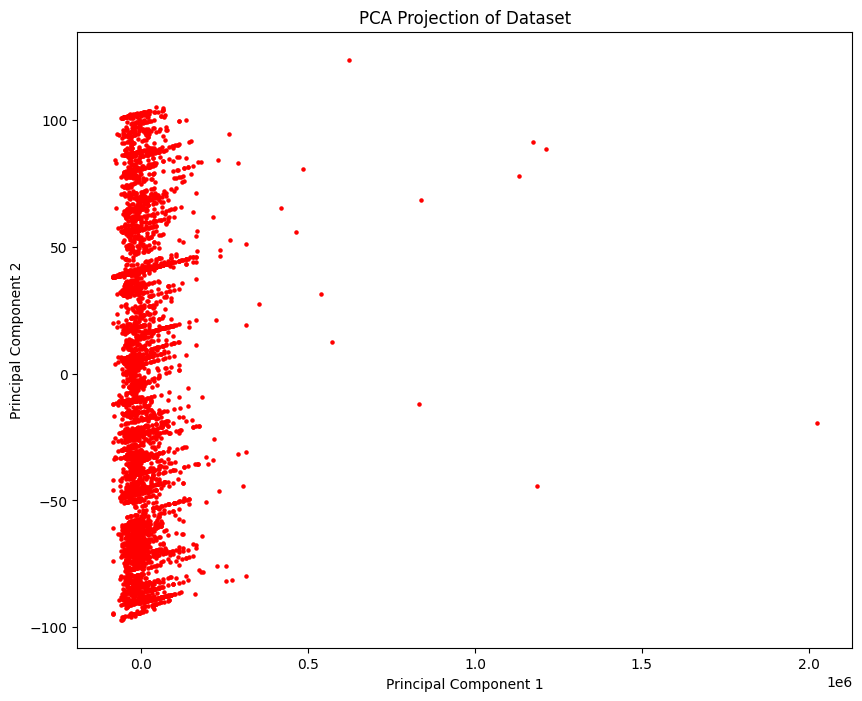

In [50]:

import warnings
warnings.filterwarnings('ignore')
X_combined_sample = X_combined.sample(n=sample_size, random_state=42)
#X_combined_sample= X_combined
y_sample = important_data['Industry_Cluster'].sample(n=sample_size, random_state=42)
#y_sample = important_data['Industry_Cluster']
pca = PCA()
X_pca = pca.fit_transform(X_combined_sample)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='r', s=5)
plt.title('PCA Projection of dataet')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Isomap

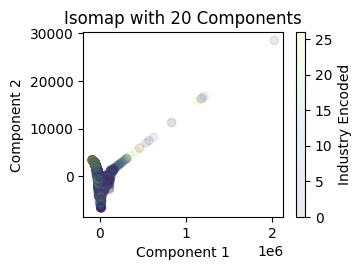

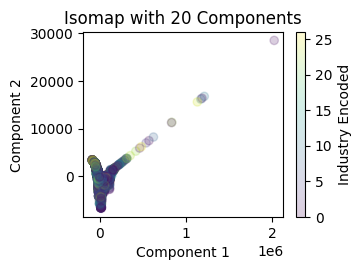

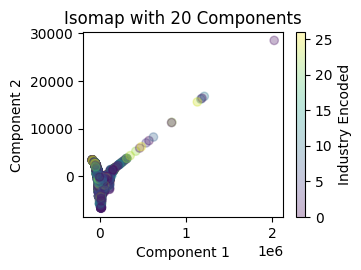

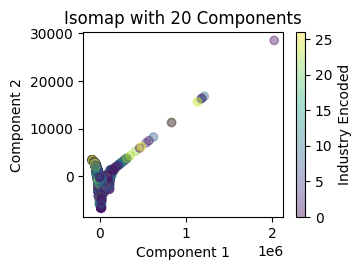

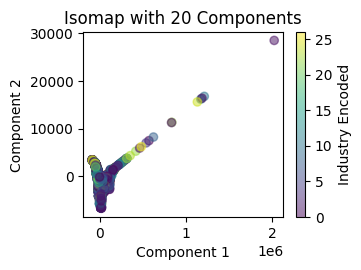

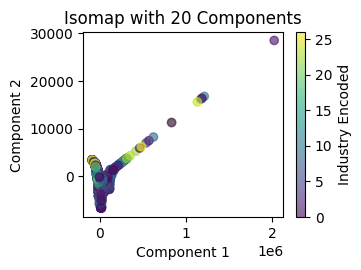

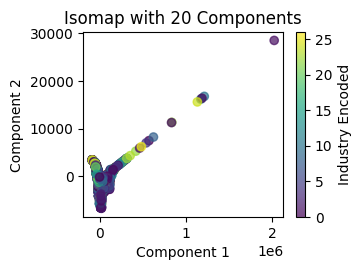

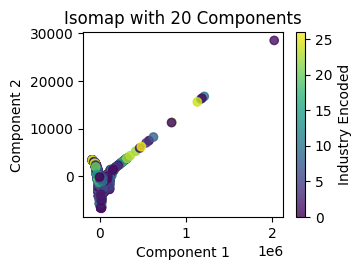

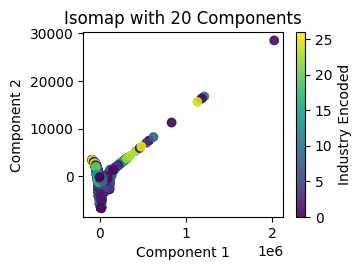

In [51]:

#n_components_range = range(2, 6)

#plt.figure(figsize=(15, 10))

#for n_components in n_components_range:
isomap = Isomap(n_components=20)
X_isomap = isomap.fit_transform(X_pca)

alphas=np.arange(0.1,1,0.1)

for alpha in alphas:
  plt.subplot(2, 2, 1)
  plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_sample, cmap='viridis', alpha=alpha)
  plt.title(f'Isomap with {20} Components')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(label='Industry Encoded')
  plt.tight_layout()
  plt.show()



#### LLE

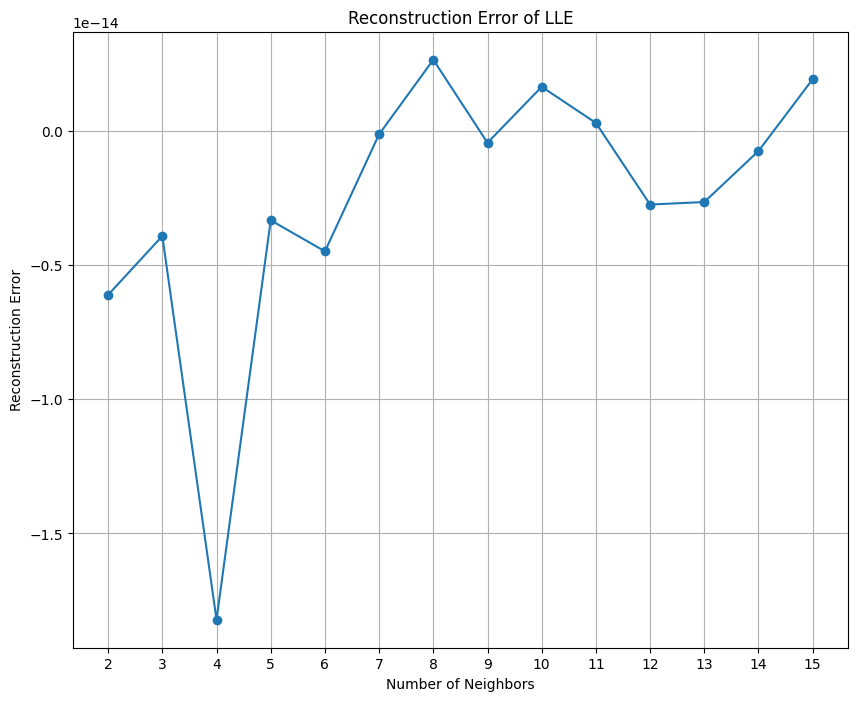

(4, -1.8216419118854067e-14)

In [53]:
from sklearn.manifold import locally_linear_embedding

errors = []
neighbors_range = range(2, 16)

for n_neighbors in neighbors_range:
    X_lle,error = locally_linear_embedding(X_pca,n_neighbors=n_neighbors, n_components=2,
                                      method='standard', eigen_solver='dense')
    errors.append(error)

plt.figure(figsize=(10, 8))
plt.plot(neighbors_range, errors, marker='o')
plt.title('Reconstruction Error of LLE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Reconstruction Error')
plt.xticks(neighbors_range)
plt.grid()
plt.show()

best_neighbors = neighbors_range[np.argmin(errors)]
best_neighbors, min(errors)



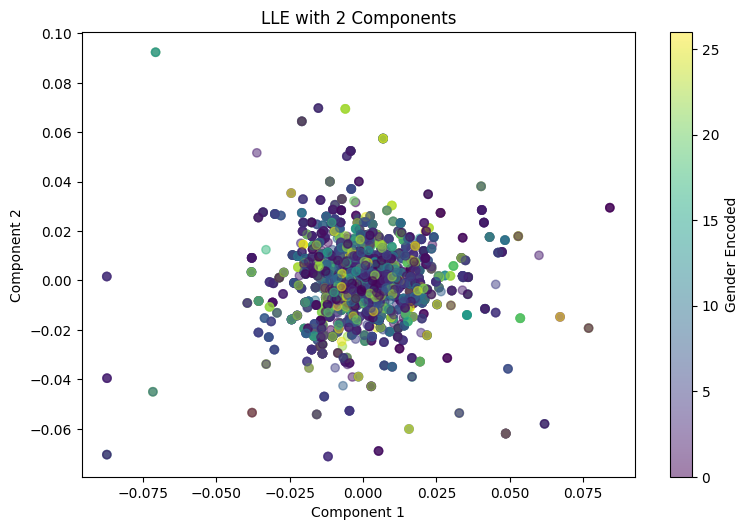

In [52]:
n_components_range = range(2, 6)

plt.figure(figsize=(15, 10))
errors = []
#for n_components in n_components_range:
X_lle,error = locally_linear_embedding(X_pca,n_components=2, eigen_solver='dense', n_neighbors=4)
errors.append(error)

plt.subplot(2, 2, 1)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_sample, cmap='viridis', alpha=0.5)
plt.title(f'LLE with {2} Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Gender Encoded')

plt.tight_layout()
plt.show()

#### TNSE

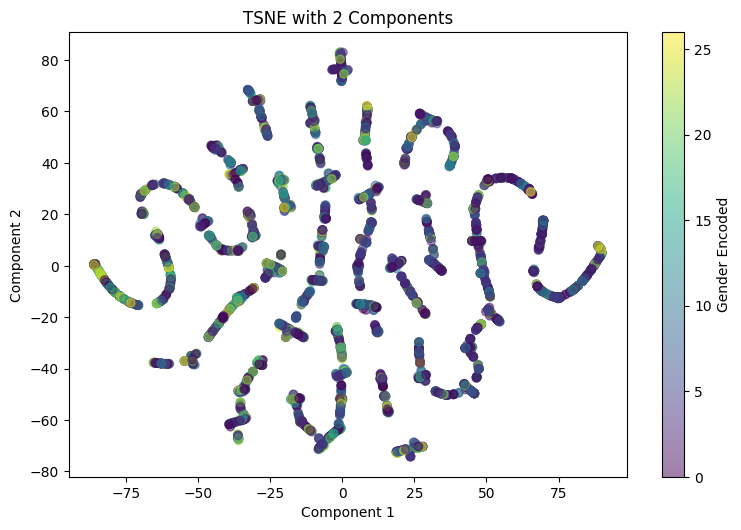

In [54]:
n_components_range = range(2, 4)

plt.figure(figsize=(15, 10))

#for n_components in n_components_range:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.subplot(2, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sample, cmap='viridis', alpha=0.5)
plt.title(f'TSNE with {2} Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Gender Encoded')

plt.tight_layout()
plt.show()

### Resultats

#### Scaler

In [55]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
features = ['Gender_Encoded', 'Age_Encoded', 'Country_Encoded',
            'Total_Experience_Encoded', 'Education_Level_Encoded',
            'Job_Title_Cluster', 'Industry_Cluster']

salary_filter = (important_data['Annual_Salary_USD'] >= 10000) & (important_data['Annual_Salary_USD'] <= 500000)
important_data_filtered = important_data[salary_filter]

X_combined = important_data_filtered[['Gender_Encoded', 'Age_Encoded', 'Country_Encoded',
                                       'Total_Experience_Encoded', 'Education_Level_Encoded',
                                       'Job_Title_Cluster', 'Industry_Cluster']]
#X_combined = important_data[['Gender_Encoded', 'Age_Encoded', 'Country_Encoded',
#                                       'Total_Experience_Encoded', 'Education_Level_Encoded',
#                                       'Job_Title_Cluster', 'Industry_Cluster']]

scaler = MinMaxScaler()
X_combined[features] = scaler.fit_transform(X_combined[features])

y_normalized = important_data_filtered['Annual_Salary_USD'].values.reshape(-1, 1)




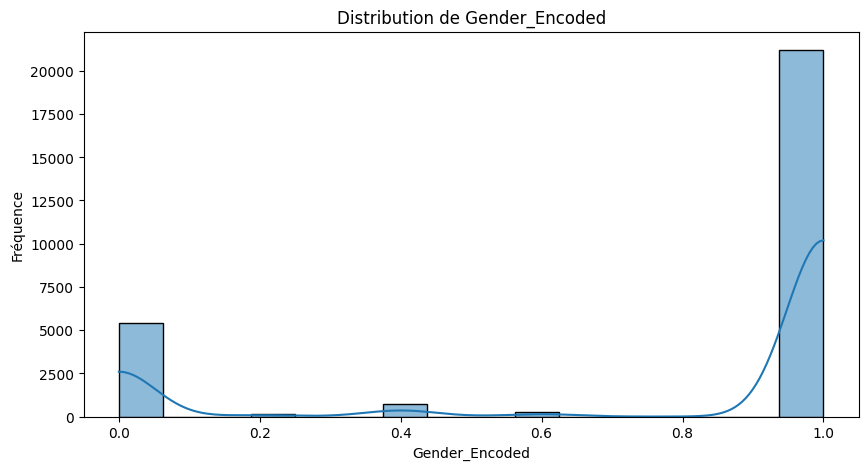

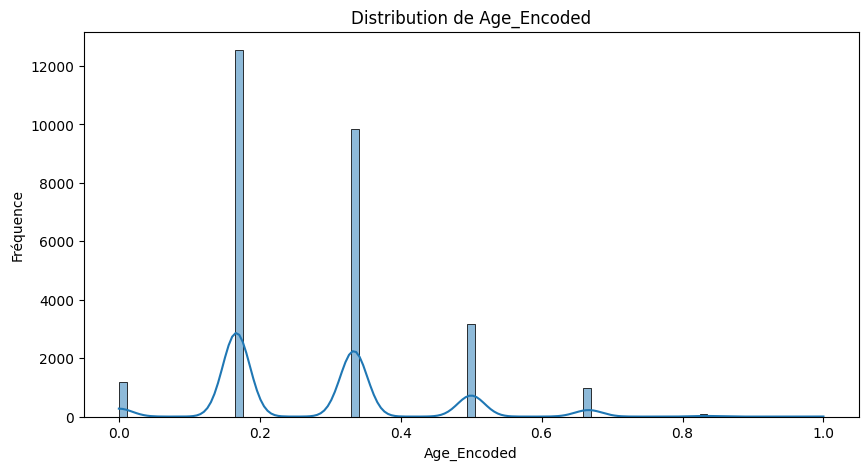

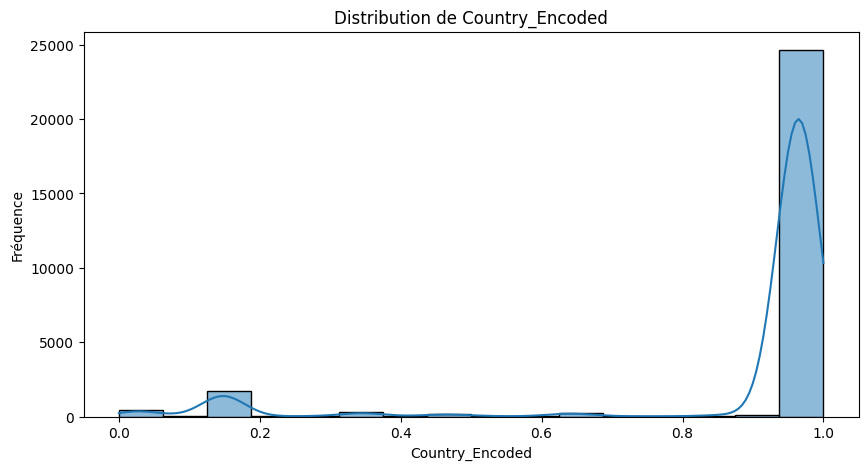

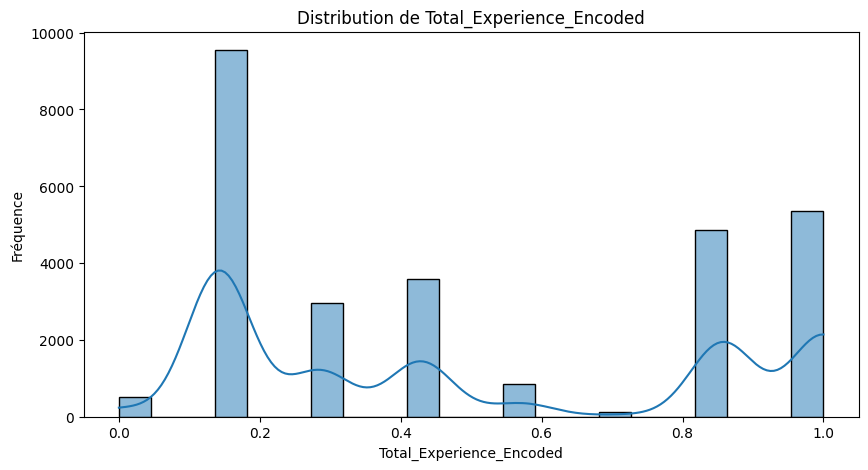

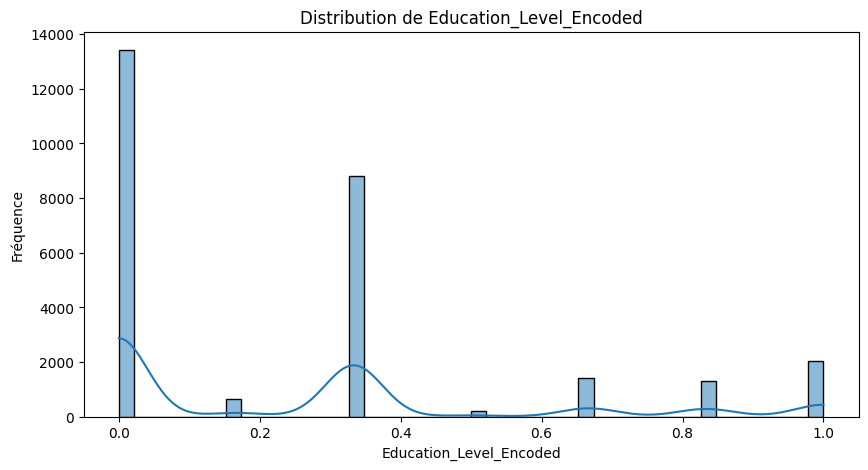

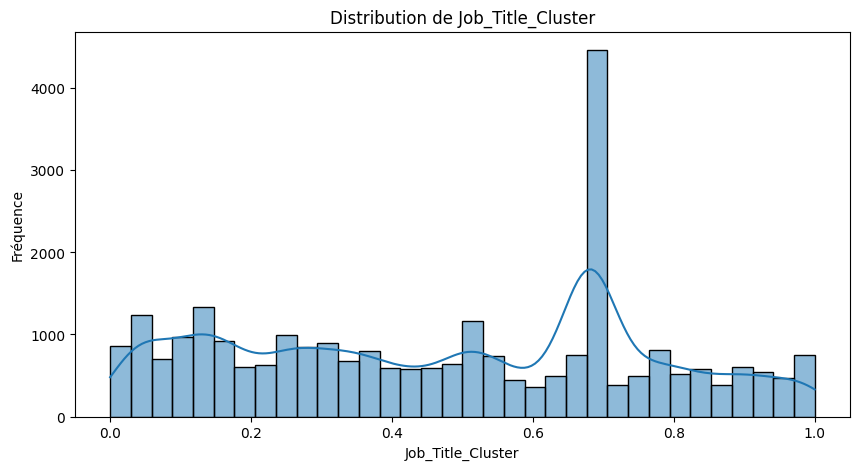

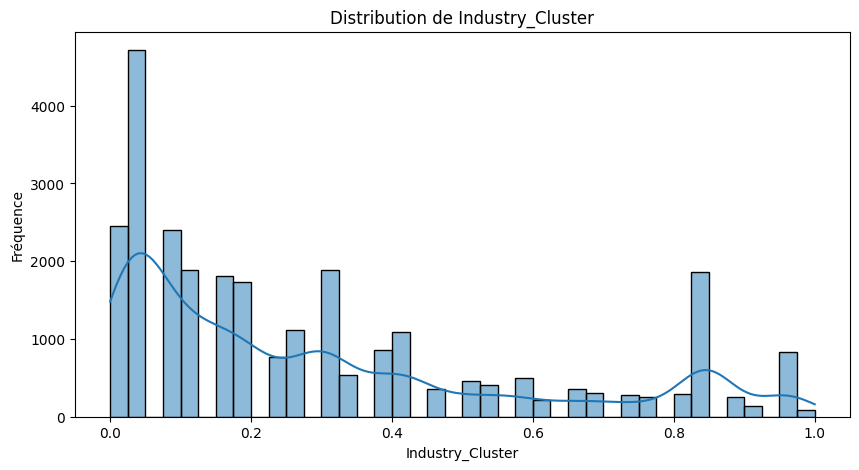

In [56]:
for column in X_combined.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(X_combined[column], kde=True)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')
    plt.show()

### LinearRegression salaires

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from itertools import combinations

def test_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    return mae


best_mae = float('inf')
best_combination = None

for i in range(1, len(features) + 1):
    for combo in combinations(features, i):
        X_reduced = X_combined[list(combo)]
        # get accuracy score


        mae = test_model(X_reduced, y_normalized)

        if mae < best_mae:
            best_mae = mae
            best_combination = combo
        print(f"Combinaison: {combo}, MAE: {mae}")



print(f"Meilleure combinaison: {best_combination}, MAE: {best_mae}")


Combinaison: ('Gender_Encoded',), MAE: 34363.955648323164
Combinaison: ('Age_Encoded',), MAE: 34230.336738251186
Combinaison: ('Country_Encoded',), MAE: 34483.236154145765
Combinaison: ('Total_Experience_Encoded',), MAE: 34832.58007626172
Combinaison: ('Education_Level_Encoded',), MAE: 35002.131952041454
Combinaison: ('Job_Title_Cluster',), MAE: 35039.37620537322
Combinaison: ('Industry_Cluster',), MAE: 34559.56167289716
Combinaison: ('Gender_Encoded', 'Age_Encoded'), MAE: 33603.54733661577
Combinaison: ('Gender_Encoded', 'Country_Encoded'), MAE: 33756.47482893777
Combinaison: ('Gender_Encoded', 'Total_Experience_Encoded'), MAE: 34201.00189765599
Combinaison: ('Gender_Encoded', 'Education_Level_Encoded'), MAE: 34306.552723007524
Combinaison: ('Gender_Encoded', 'Job_Title_Cluster'), MAE: 34375.61112075041
Combinaison: ('Gender_Encoded', 'Industry_Cluster'), MAE: 33991.39688399535
Combinaison: ('Age_Encoded', 'Country_Encoded'), MAE: 33739.26531663036
Combinaison: ('Age_Encoded', 'Total_

### RandomForest salaires

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from itertools import combinations

def test_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    return mae


best_mae = float('inf')
best_combination = None

for i in range(1, len(features) + 1):
    for combo in combinations(features, i):
        X_reduced = X_combined[list(combo)]
        mae = test_model(X_reduced, y_normalized)
        if mae < best_mae:
            best_mae = mae
            best_combination = combo
        print(f"Combinaison: {combo}, MAE: {mae}")

print(f"Meilleure combinaison: {best_combination}, MAE: {best_mae}")



Combinaison: ('Gender_Encoded',), MAE: 34184.991006890596
Combinaison: ('Age_Encoded',), MAE: 33993.992393537585
Combinaison: ('Country_Encoded',), MAE: 33919.48587726167
Combinaison: ('Total_Experience_Encoded',), MAE: 33764.463150150346
Combinaison: ('Education_Level_Encoded',), MAE: 34156.07585439267
Combinaison: ('Job_Title_Cluster',), MAE: 28947.240732092618
Combinaison: ('Industry_Cluster',), MAE: 31614.111201837324
Combinaison: ('Gender_Encoded', 'Age_Encoded'), MAE: 33262.03803051146
Combinaison: ('Gender_Encoded', 'Country_Encoded'), MAE: 32980.601717444755
Combinaison: ('Gender_Encoded', 'Total_Experience_Encoded'), MAE: 32914.37819138743
Combinaison: ('Gender_Encoded', 'Education_Level_Encoded'), MAE: 33073.99029627596
Combinaison: ('Gender_Encoded', 'Job_Title_Cluster'), MAE: 28991.780495964227
Combinaison: ('Gender_Encoded', 'Industry_Cluster'), MAE: 31482.381426696134
Combinaison: ('Age_Encoded', 'Country_Encoded'), MAE: 33087.37186645462
Combinaison: ('Age_Encoded', 'Tot

### Decision Tree

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations

def test_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = DecisionTreeRegressor(random_state=42)
    y_log = np.log1p(y_train)
    model.fit(X_train, y_log)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    r2_score = model.score(X_test, y_test)
    mae = mean_absolute_error(y_test, y_pred)
    return mae,r2_score



best_mae = float('inf')
best_combination = None
best_score = float('-inf')
best_combination_score = None

for i in range(1, len(features) + 1):
    for combo in combinations(features, i):
        X_reduced = X_combined[list(combo)]
        mae,r2_score = test_model(X_reduced, y_normalized)
        if mae < best_mae:
            best_mae = mae
            best_combination = combo


        print(f"Combinaison: {combo}, MAE: {mae}")


print(f"Meilleure combinaison: {best_combination}, MAE: {best_mae}")





Combinaison: ('Gender_Encoded',), MAE: 32757.228603143696
Combinaison: ('Age_Encoded',), MAE: 32464.07662664988
Combinaison: ('Country_Encoded',), MAE: 32563.935726991414
Combinaison: ('Total_Experience_Encoded',), MAE: 32351.352993746495
Combinaison: ('Education_Level_Encoded',), MAE: 32613.267088055643
Combinaison: ('Job_Title_Cluster',), MAE: 28126.953003224007
Combinaison: ('Industry_Cluster',), MAE: 30627.109849225606
Combinaison: ('Gender_Encoded', 'Age_Encoded'), MAE: 31851.66635540586
Combinaison: ('Gender_Encoded', 'Country_Encoded'), MAE: 31827.10547980979
Combinaison: ('Gender_Encoded', 'Total_Experience_Encoded'), MAE: 31663.391393774367
Combinaison: ('Gender_Encoded', 'Education_Level_Encoded'), MAE: 31783.89866383029
Combinaison: ('Gender_Encoded', 'Job_Title_Cluster'), MAE: 28276.852617114102
Combinaison: ('Gender_Encoded', 'Industry_Cluster'), MAE: 30473.96551167562
Combinaison: ('Age_Encoded', 'Country_Encoded'), MAE: 31805.329125406282
Combinaison: ('Age_Encoded', 'To

### XGB Regressor

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from itertools import combinations

def test_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=10)

    y_log = np.log1p(y_train)
    model.fit(X_train, y_log)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)


    mae = mean_absolute_error(y_test, y_pred)
    return mae


best_mae = float('inf')
best_combination = None

for i in range(1, len(features) + 1):
    for combo in combinations(features, i):
        X_reduced = X_combined[list(combo)]
        mae = test_model(X_reduced, y_normalized)

        if mae < best_mae:
            best_mae = mae
            best_combination = combo
        print(f"Combinaison: {combo}, MAE: {mae}")


print(f"Meilleure combinaison: {best_combination}, MAE: {best_mae}")


Combinaison: ('Gender_Encoded',), MAE: 34046.6979615938
Combinaison: ('Age_Encoded',), MAE: 33563.02837447099
Combinaison: ('Country_Encoded',), MAE: 33770.458506337345
Combinaison: ('Total_Experience_Encoded',), MAE: 33463.51802724436
Combinaison: ('Education_Level_Encoded',), MAE: 33785.0539758316
Combinaison: ('Job_Title_Cluster',), MAE: 29295.184467377094
Combinaison: ('Industry_Cluster',), MAE: 31896.715280707107
Combinaison: ('Gender_Encoded', 'Age_Encoded'), MAE: 32828.4516657853
Combinaison: ('Gender_Encoded', 'Country_Encoded'), MAE: 32918.29640983896
Combinaison: ('Gender_Encoded', 'Total_Experience_Encoded'), MAE: 32655.81724314494
Combinaison: ('Gender_Encoded', 'Education_Level_Encoded'), MAE: 32955.81391838349
Combinaison: ('Gender_Encoded', 'Job_Title_Cluster'), MAE: 29170.88985522684
Combinaison: ('Gender_Encoded', 'Industry_Cluster'), MAE: 31600.71903284896
Combinaison: ('Age_Encoded', 'Country_Encoded'), MAE: 32730.5357670918
Combinaison: ('Age_Encoded', 'Total_Experi

## Comparaison des Algorithmes de Machine Learning pour  Prédiction des Salaires

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = important_data.drop(columns=['Annual_Salary'])  
y = important_data['Annual_Salary'].apply(lambda x: float(str(x).replace(',', '')))  

# Encodage des colonnes catégoriques
categorical_columns = X.select_dtypes(include=['object']).columns  
for col in categorical_columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col].astype(str))
print(X.dtypes)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélection des caractéristiques 
k_best = SelectKBest(score_func=f_regression, k=10)  
X_train_k_best = k_best.fit_transform(X_train, y_train)
selected_features_kbest = X_train.columns[k_best.get_support()]
print("Caractéristiques principales pour Annual_Salary :", selected_features_kbest)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_k_best, y_train)
X_test_k_best = k_best.transform(X_test) 
y_pred = rf_regressor.predict(X_test_k_best)

print("Évaluation de la régression :")
print("Mean Squared Error (MSE) :", mean_squared_error(y_test, y_pred))
print("R2 Score :", r2_score(y_test, y_pred))


Age                    int64
Industry               int64
Job_Title              int64
Currency               int64
Country                int64
Gender                 int64
Total_Experience       int64
Education_Level        int64
Annual_Salary_USD    float64
dtype: object
Caractéristiques principales pour Annual_Salary : Index(['Age', 'Industry', 'Job_Title', 'Currency', 'Country', 'Gender',
       'Total_Experience', 'Education_Level', 'Annual_Salary_USD'],
      dtype='object')


C:\Users\EL mahjoubi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


Évaluation de la régression :
Mean Squared Error (MSE) : 2714228365.822233
R2 Score : 0.8908244822160093


##### Interprétation des résultats :
 Ces colonnes ont été identifiées comme ayant la plus grande corrélation avec la variable cible `Annual_Salary` à l’aide de la méthode statistique **f_regression**. Elles expliquent en grande partie les variations des salaires annuels.
   - **Mean Squared Error (MSE)** : `10416374124.662493`
     - C'est une mesure de l'erreur quadratique moyenne entre les prédictions et les valeurs réelles du salaire annuel.
     - Une valeur élevée indique que le modèle peut encore être amélioré pour réduire les erreurs.
   - **R² Score** : `0.8642763817877865`
     - Ce score montre que **86,4% de la variance** dans les données de `Annual_Salary` est expliquée par le modèle.
     - Un score proche de 1 indique une bonne performance, ce qui signifie que le modèle est capable de prédire les salaires de manière relativement précise.

##### Conclusion:
   - Le modèle a une bonne capacité prédictive, avec un R² élevé de 86,4%.
   - Cependant, l’erreur quadratique moyenne (MSE) reste relativement élevée, ce qui suggère qu'il y a encore de la place pour améliorer la précision des prédictions, surtout pour les salaires les plus éloignés de la moyenne.
   - La présence de colonnes comme `Age`, `Industry`, `Job_Title`, `Currency` et `Total_Experience` parmi les caractéristiques principales est logique, car elles sont souvent directement liées aux salaires.
   - `Gender` et `Education_Level` apparaissent également comme significatifs, ce qui pourrait refléter des disparités salariales en fonction du genre et du niveau d'éducation.


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Modèle Gradient Boosting
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_k_best, y_train)
y_pred_gb = gb_regressor.predict(X_test_k_best)


print("Gradient Boosting:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting:
Mean Squared Error (MSE): 4094583753.238601
R2 Score: 0.8353018828486378


In [17]:
from xgboost import XGBRegressor

# Modèle XGBoost
xgb_regressor = XGBRegressor(random_state=42, objective='reg:squarederror')
xgb_regressor.fit(X_train_k_best, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_k_best)

print("XGBoost:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))


XGBoost:
Mean Squared Error (MSE): 15072761106.098303
R2 Score: 0.3937221646807978


In [18]:
print("\nRésumé des performances:")
print("Random Forest: MSE =", mean_squared_error(y_test, y_pred), ", R2 =", r2_score(y_test, y_pred))
print("Gradient Boosting: MSE =", mean_squared_error(y_test, y_pred_gb), ", R2 =", r2_score(y_test, y_pred_gb))
print("XGBoost: MSE =", mean_squared_error(y_test, y_pred_xgb), ", R2 =", r2_score(y_test, y_pred_xgb))



Résumé des performances:
Random Forest: MSE = 2714228365.822233 , R2 = 0.8908244822160093
Gradient Boosting: MSE = 4094583753.238601 , R2 = 0.8353018828486378
XGBoost: MSE = 15072761106.098303 , R2 = 0.3937221646807978



D'après les résultats des trois modèles testés (**Random Forest**, **Gradient Boosting**, et **XGBoost**) :

1. **Random Forest** :
   - Ce modèle offre la meilleure performance globale avec le plus faible MSE et le score R² le plus élevé. Il explique environ **89% de la variance** des salaires, ce qui le rend robuste pour ce problème.

2. **Gradient Boosting** :
   - Gradient Boosting est légèrement moins performant que Random Forest, avec un MSE plus élevé et un score R² plus bas. Cela peut s'expliquer par une sensibilité accrue à l'hyperparamétrisation ou à des données bruitées.

3. **XGBoost** :
   - XGBoost affiche une performance nettement inférieure, avec un MSE beaucoup plus élevé et un R² de seulement **39%**. Ce résultat pourrait indiquer un besoin d'ajuster les hyperparamètres du modèle ou un problème d'overfitting/underfitting.

**Modèle recommandé** : Le **Random Forest** est clairement le modèle le plus performant dans ce contexte. Il présente un équilibre optimal entre précision et robustesse sans ajustements complexes.

